EXPLORATORY DATA ANALYSIS: CRIMES AGAINST WOMEN IN INDIA (2001-2021)

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Dataset Shape: (736, 10)

Column Names:
['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']

Data Types:
Unnamed: 0     int64
State         object
Year           int64
Rape           int64
K&A            int64
DD             int64
AoW            int64
AoM            int64
DV             int64
WT             int64
dtype: object

First few rows:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   16

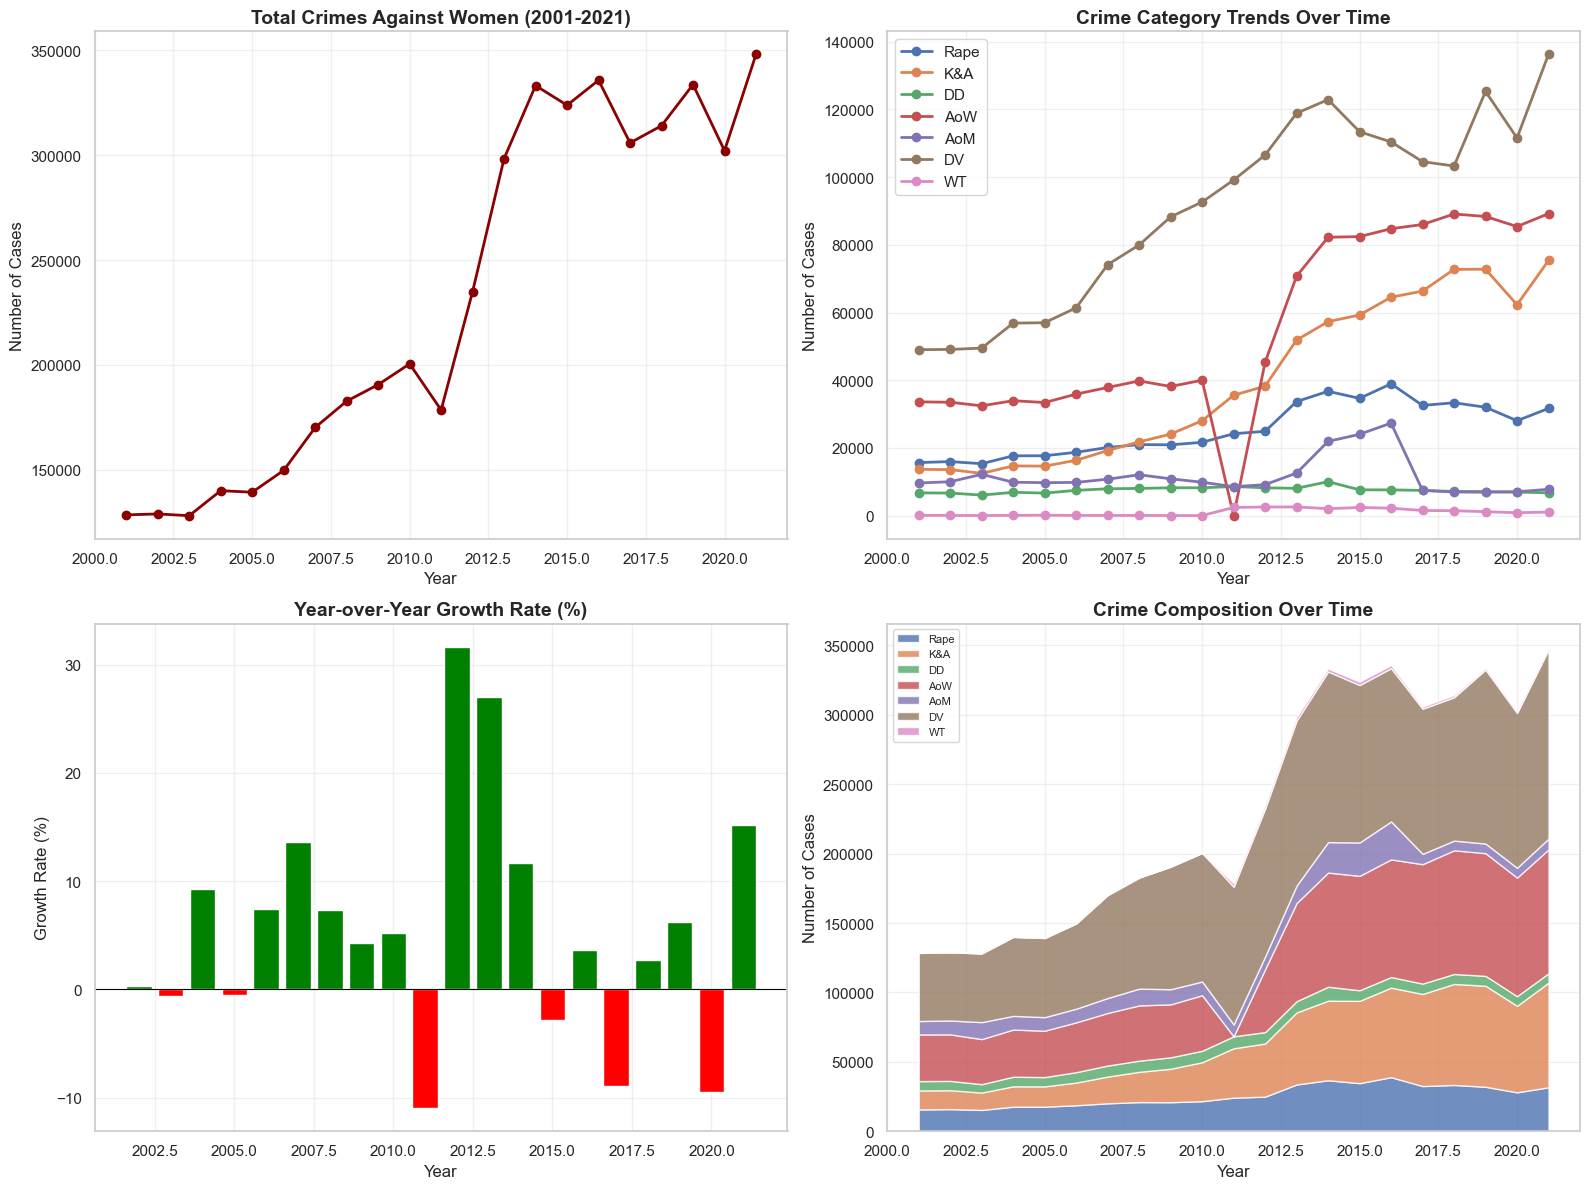


4. CRIME CATEGORY ANALYSIS
--------------------------------------------------------------------------------

Total Cases by Crime Type (2001-2021):
DV      1909978
AoW     1162229
K&A      835023
Rape     535702
AoM      244884
DD       158750
WT        21156
dtype: int64


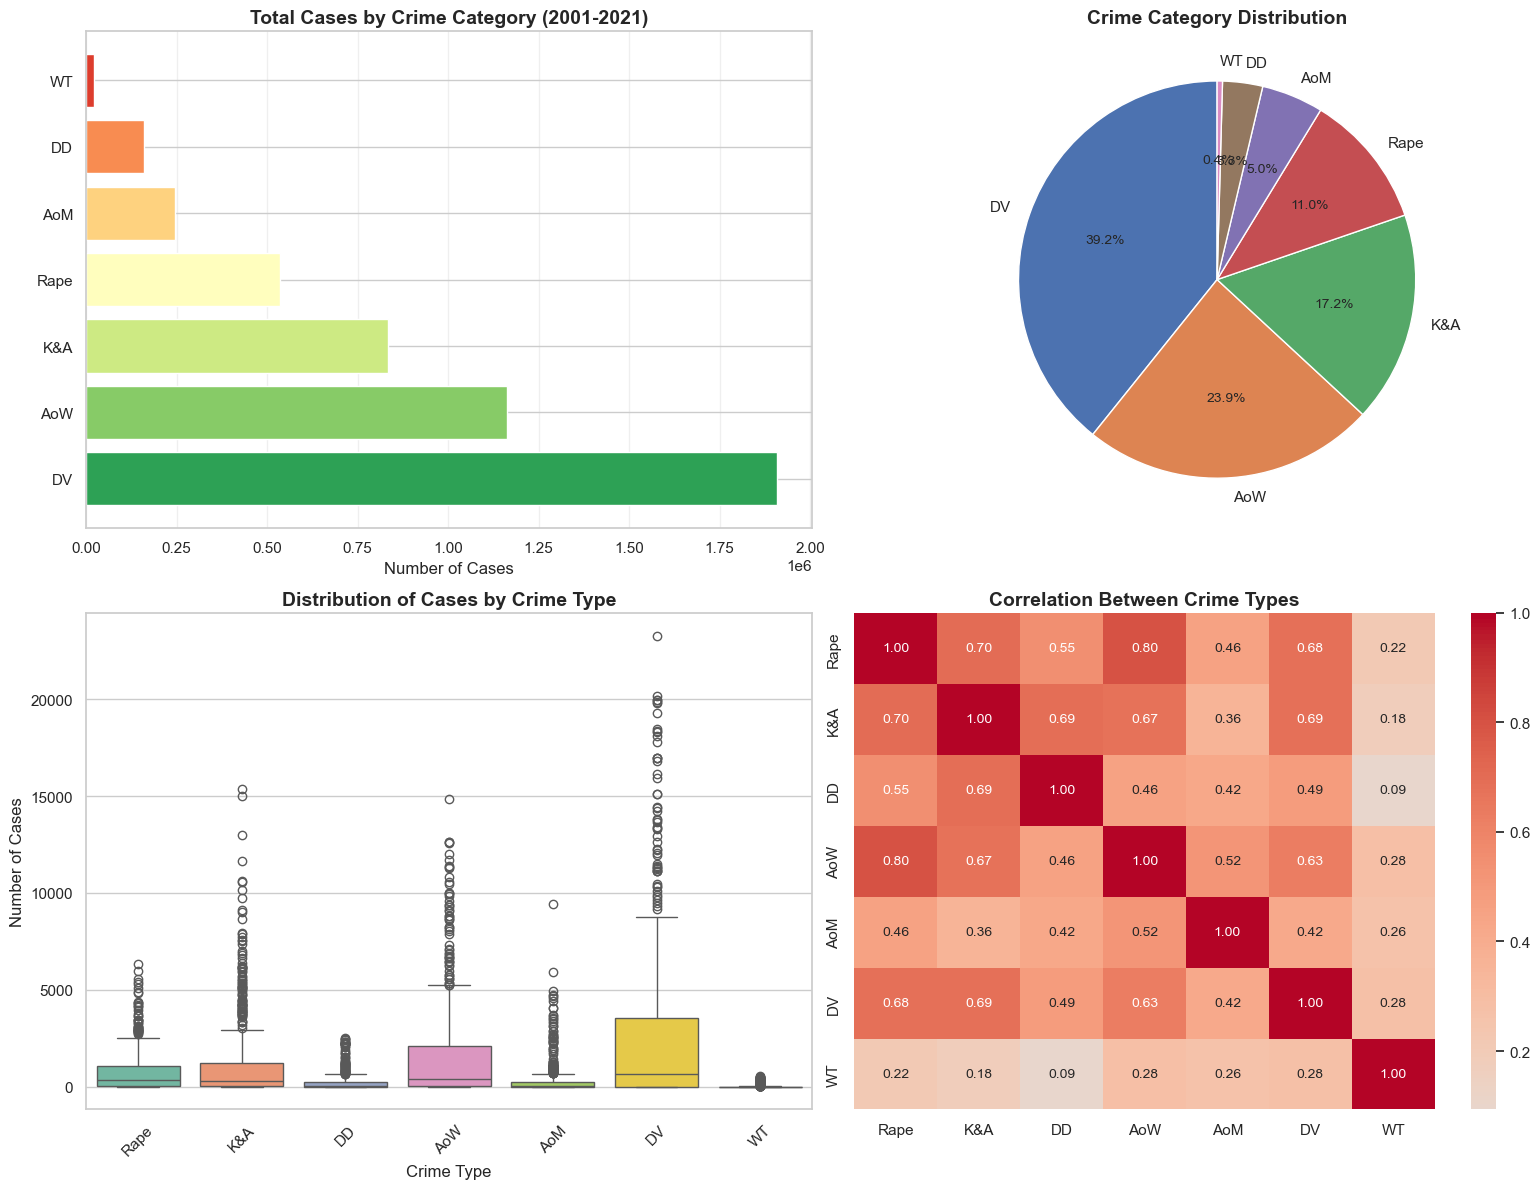


5. STATE-WISE ANALYSIS
--------------------------------------------------------------------------------

Top 10 States with Highest Total Crimes:
State
Uttar Pradesh     350934
West Bengal       265807
Madhya Pradesh    262794
Rajasthan         243022
Maharashtra       232095
Assam             223410
Andhra Pradesh    200042
ANDHRA PRADESH    191081
UTTAR PRADESH     178800
MADHYA PRADESH    150363
Name: Total, dtype: int64

Bottom 10 States with Lowest Total Crimes:
State
PUDUCHERRY       1102
GOA               909
Puducherry        691
A & N ISLANDS     475
SIKKIM            425
NAGALAND          324
D & N HAVELI      212
DAMAN & DIU        77
Lakshadweep        54
LAKSHADWEEP        18
Name: Total, dtype: int64


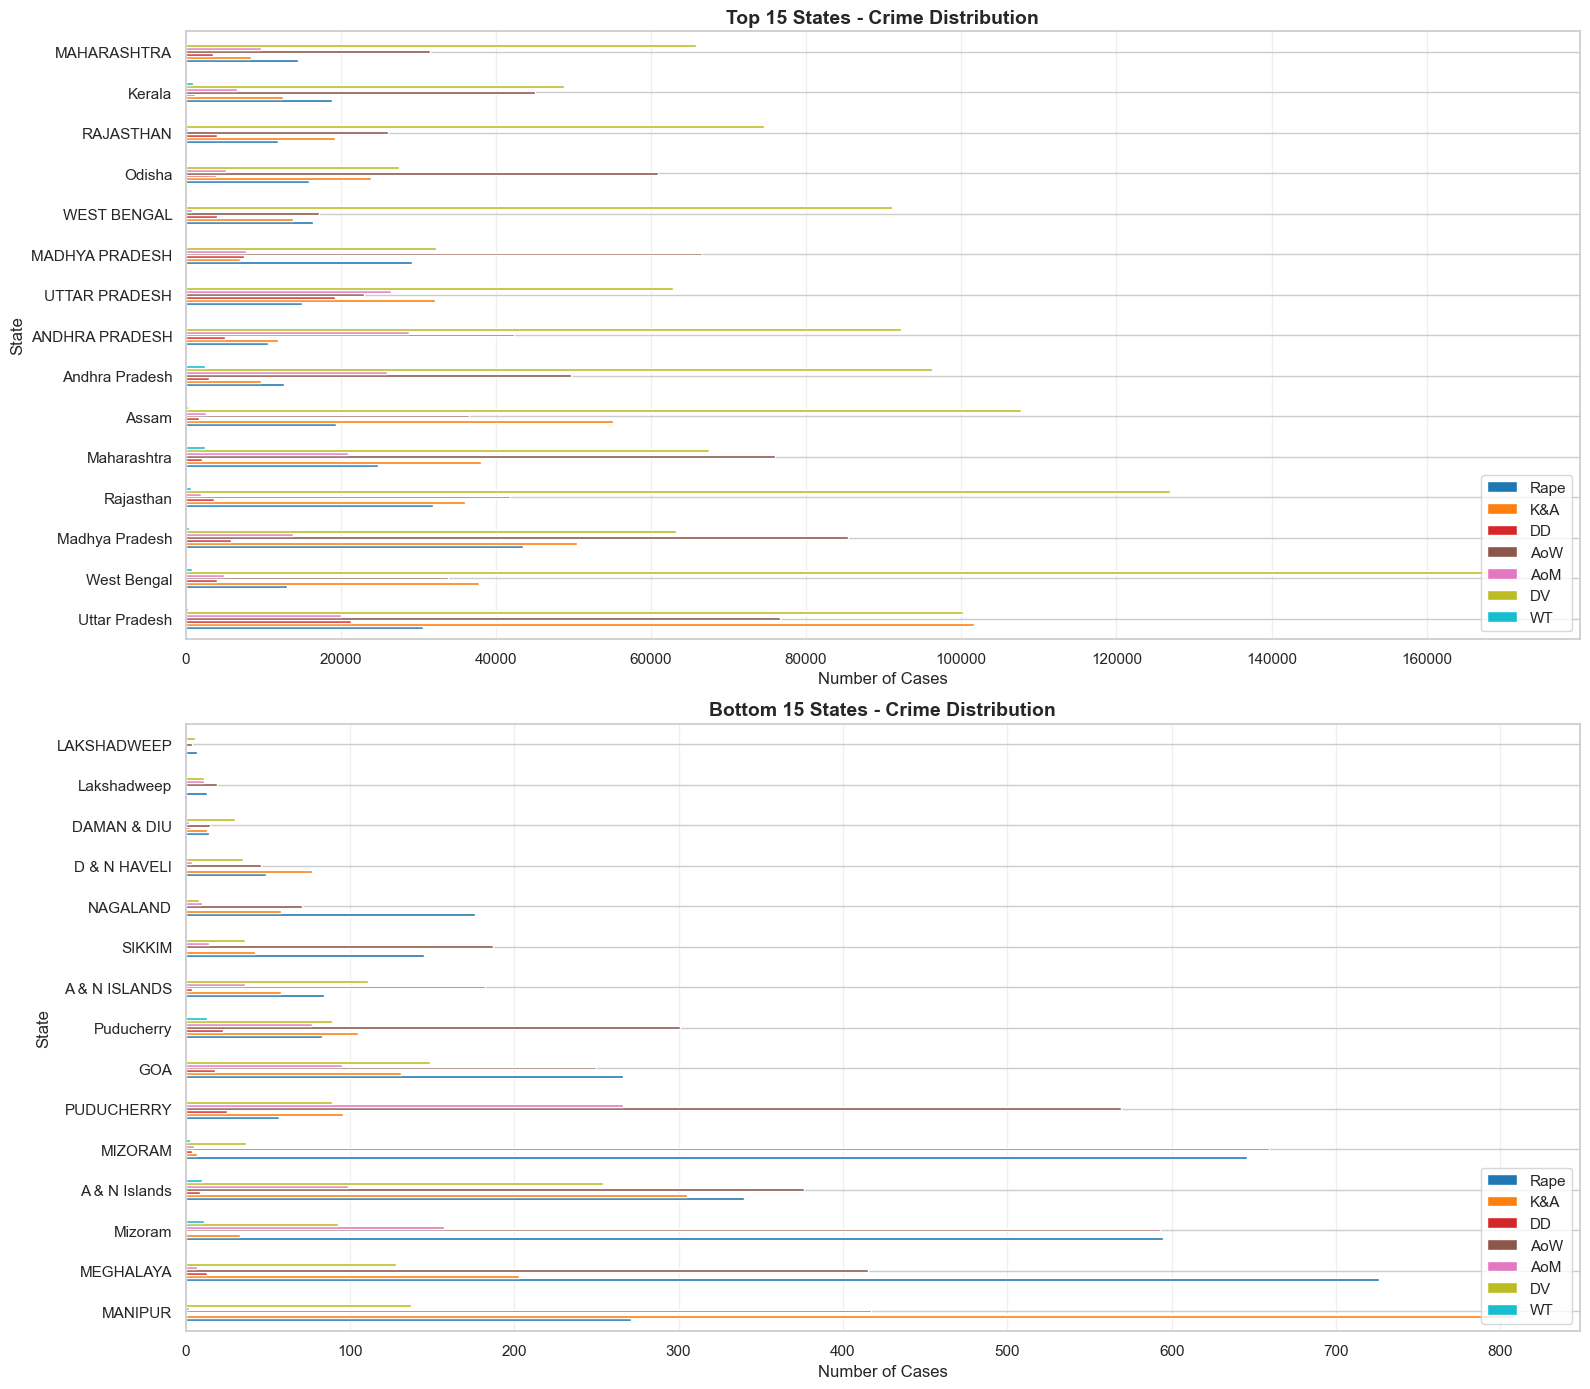

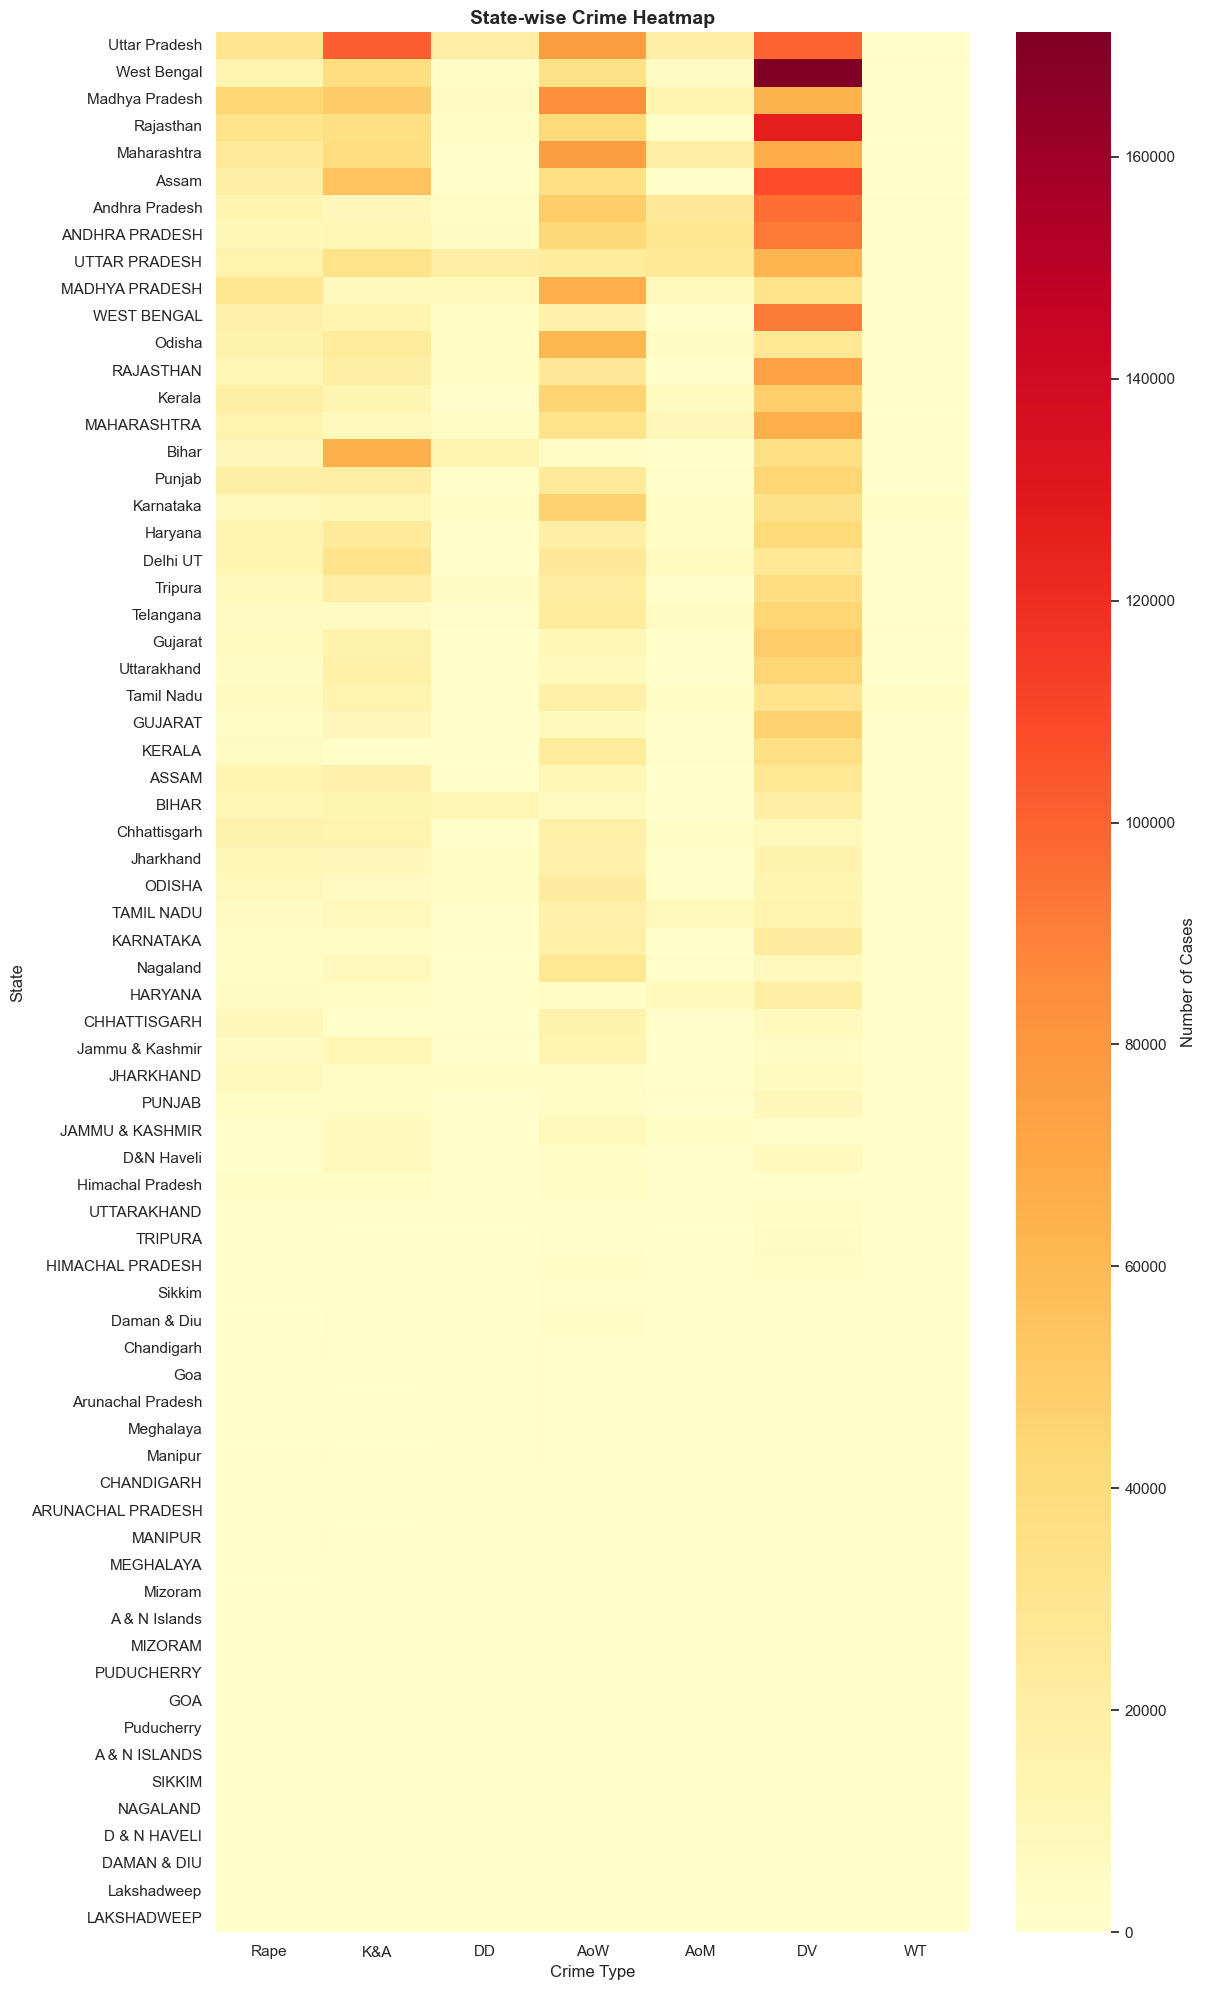


6. STATISTICAL INSIGHTS
--------------------------------------------------------------------------------

Average Annual Growth Rate by Crime Type:
Rape: 3.57%
K&A: 8.91%
DD: 0.01%
AoW: 5.00%
AoM: -1.07%
DV: 5.24%
WT: 11.85%

Crime Severity Index (Normalized to 100):
DV      39.237615
AoW     23.876240
K&A     17.154287
Rape    11.005189
AoM      5.030772
DD       3.261279
WT       0.434618
dtype: float64


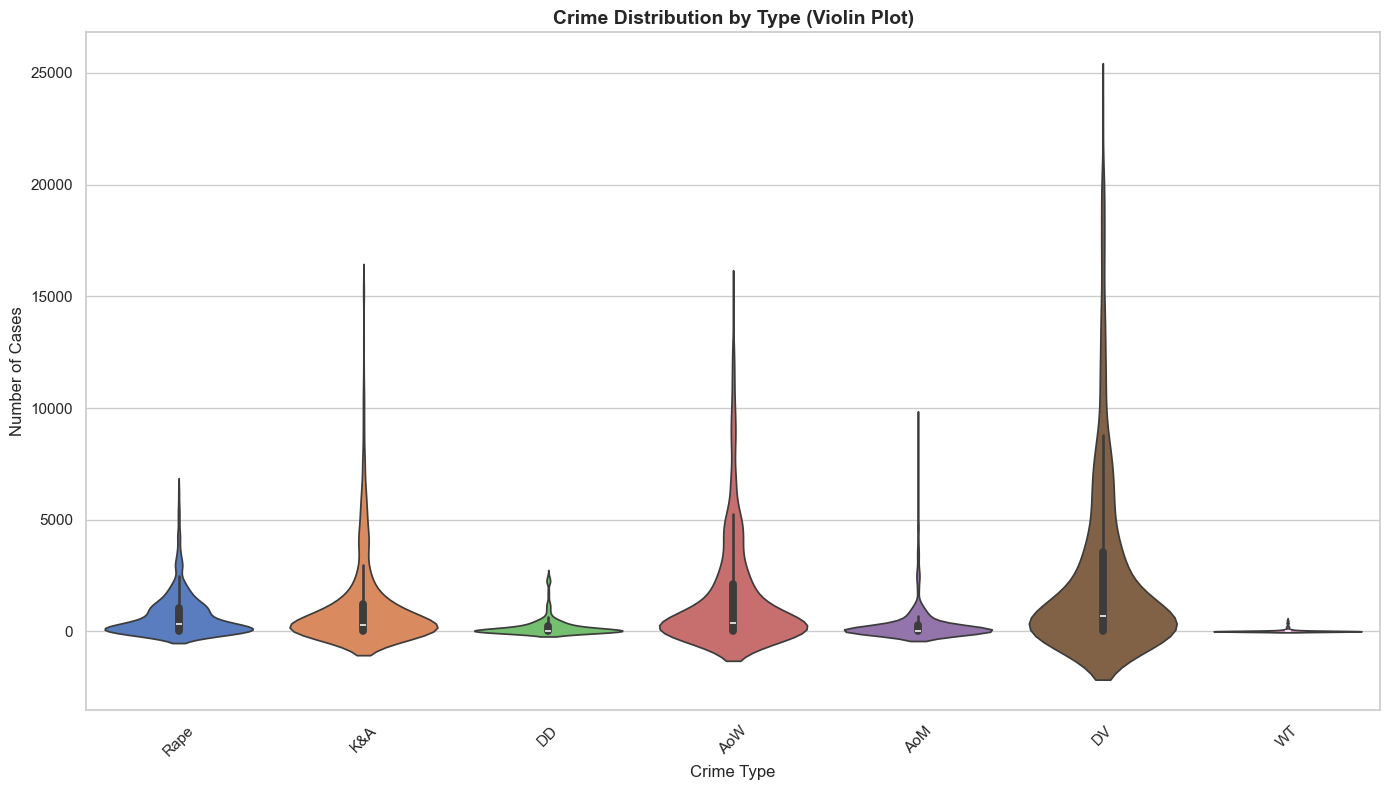

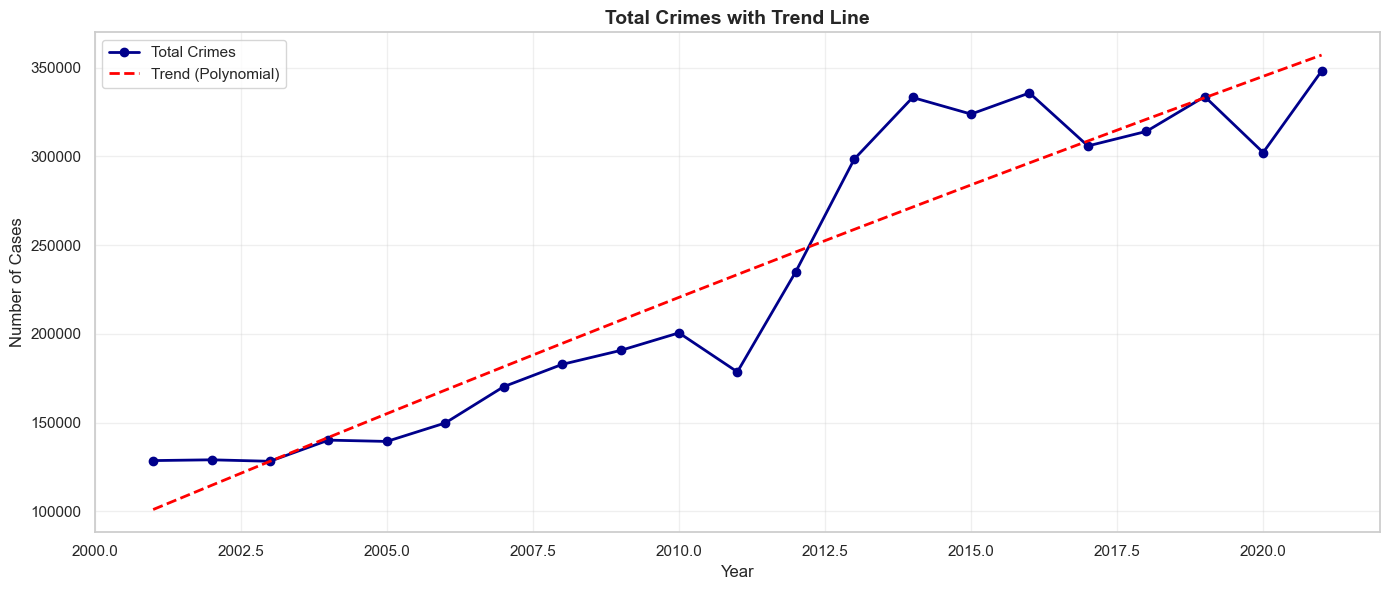


KEY FINDINGS SUMMARY

1. Total crimes reported (2001-2021): 4,867,722
2. Most prevalent crime type: DV (1,909,978 cases)
3. State with highest crimes: Uttar Pradesh (350,934 cases)
4. State with lowest crimes: LAKSHADWEEP (18 cases)
5. Year with highest crimes: 2021 (348,092 cases)
6. Year with lowest crimes: 2003 (128,142 cases)
7. Overall trend: Increasing



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Load your dataset
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('CrimesOnWomenData.csv')

print("="*80)
print("EXPLORATORY DATA ANALYSIS: CRIMES AGAINST WOMEN IN INDIA (2001-2021)")
print("="*80)

# ============================================================================
# 1. DATA OVERVIEW
# ============================================================================
print("\n1. DATASET OVERVIEW")
print("-"*80)
print(f"Dataset Shape: {df.shape}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst few rows:\n{df.head()}")

# Check for missing values
print(f"\nMissing Values:\n{df.isnull().sum()}")

# Basic statistics
print(f"\nBasic Statistics:\n{df.describe()}")

# ============================================================================
# 2. DATA CLEANING & PREPARATION
# ============================================================================
print("\n2. DATA CLEANING")
print("-"*80)

# Remove any duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()

# Handle missing values if any
df = df.fillna(0)

# ============================================================================
# 3. TEMPORAL ANALYSIS
# ============================================================================
print("\n3. TEMPORAL ANALYSIS")
print("-"*80)

# Yearly trend for all crime categories
yearly_data = df.groupby('Year')[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum()
print(f"\nYearly Total Crimes:\n{yearly_data}")

# Plot 1: Overall trend of crimes over years
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total crimes per year
yearly_data['Total'] = yearly_data.sum(axis=1)
axes[0, 0].plot(yearly_data.index, yearly_data['Total'], marker='o', linewidth=2, color='darkred')
axes[0, 0].set_title('Total Crimes Against Women (2001-2021)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Cases')
axes[0, 0].grid(True, alpha=0.3)

# Individual crime trends
crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
for col in crime_cols:
    axes[0, 1].plot(yearly_data.index, yearly_data[col], marker='o', label=col, linewidth=2)
axes[0, 1].set_title('Crime Category Trends Over Time', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Cases')
axes[0, 1].legend(loc='best')
axes[0, 1].grid(True, alpha=0.3)

# Year-over-year growth rate
yearly_data['YoY_Growth'] = yearly_data['Total'].pct_change() * 100
axes[1, 0].bar(yearly_data.index[1:], yearly_data['YoY_Growth'][1:], color=['green' if x > 0 else 'red' for x in yearly_data['YoY_Growth'][1:]])
axes[1, 0].set_title('Year-over-Year Growth Rate (%)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Growth Rate (%)')
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 0].grid(True, alpha=0.3)

# Crime composition by year (stacked area chart)
axes[1, 1].stackplot(yearly_data.index, 
                     yearly_data['Rape'], yearly_data['K&A'], yearly_data['DD'],
                     yearly_data['AoW'], yearly_data['AoM'], yearly_data['DV'], yearly_data['WT'],
                     labels=crime_cols, alpha=0.8)
axes[1, 1].set_title('Crime Composition Over Time', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Cases')
axes[1, 1].legend(loc='upper left', fontsize=8)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 4. CRIME CATEGORY ANALYSIS
# ============================================================================
print("\n4. CRIME CATEGORY ANALYSIS")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total cases by crime type
total_by_crime = df[crime_cols].sum().sort_values(ascending=False)
print(f"\nTotal Cases by Crime Type (2001-2021):\n{total_by_crime}")

# Bar plot
axes[0, 0].barh(total_by_crime.index, total_by_crime.values, color=sns.color_palette("RdYlGn_r", len(total_by_crime)))
axes[0, 0].set_title('Total Cases by Crime Category (2001-2021)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Cases')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Pie chart for percentage distribution
axes[0, 1].pie(total_by_crime.values, labels=total_by_crime.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Crime Category Distribution', fontsize=14, fontweight='bold')

# Box plot for distribution across years
df_melted = df.melt(id_vars=['State', 'Year'], value_vars=crime_cols, var_name='Crime_Type', value_name='Cases')
sns.boxplot(data=df_melted, x='Crime_Type', y='Cases', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Distribution of Cases by Crime Type', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Crime Type')
axes[1, 0].set_ylabel('Number of Cases')
axes[1, 0].tick_params(axis='x', rotation=45)

# Heatmap of correlation between crime types
corr_matrix = df[crime_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Between Crime Types', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 5. STATE-WISE ANALYSIS
# ============================================================================
print("\n5. STATE-WISE ANALYSIS")
print("-"*80)

# Total crimes by state
state_totals = df.groupby('State')[crime_cols].sum()
state_totals['Total'] = state_totals.sum(axis=1)
state_totals_sorted = state_totals.sort_values('Total', ascending=False)

print(f"\nTop 10 States with Highest Total Crimes:\n{state_totals_sorted.head(10)['Total']}")
print(f"\nBottom 10 States with Lowest Total Crimes:\n{state_totals_sorted.tail(10)['Total']}")

# Visualizations
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Top 15 states
top_15_states = state_totals_sorted.head(15)
top_15_states[crime_cols].plot(kind='barh', stacked=False, ax=axes[0], colormap='tab10')
axes[0].set_title('Top 15 States - Crime Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Cases')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3, axis='x')

# Bottom 15 states
bottom_15_states = state_totals_sorted.tail(15)
bottom_15_states[crime_cols].plot(kind='barh', stacked=False, ax=axes[1], colormap='tab10')
axes[1].set_title('Bottom 15 States - Crime Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Cases')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Heatmap: States vs Crime Types
fig, ax = plt.subplots(figsize=(12, 20))
sns.heatmap(state_totals_sorted[crime_cols], annot=False, cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Number of Cases'})
ax.set_title('State-wise Crime Heatmap', fontsize=14, fontweight='bold')
ax.set_xlabel('Crime Type')
ax.set_ylabel('State')
plt.tight_layout()
plt.show()

# ============================================================================
# 6. STATISTICAL INSIGHTS
# ============================================================================
print("\n6. STATISTICAL INSIGHTS")
print("-"*80)

# Average annual growth rate for each crime type
print("\nAverage Annual Growth Rate by Crime Type:")
for col in crime_cols:
    yearly_crime = df.groupby('Year')[col].sum()
    if len(yearly_crime) > 1 and yearly_crime.iloc[0] != 0:
        cagr = ((yearly_crime.iloc[-1] / yearly_crime.iloc[0]) ** (1 / (len(yearly_crime) - 1)) - 1) * 100
        print(f"{col}: {cagr:.2f}%")

# Crime severity index (normalized)
print("\nCrime Severity Index (Normalized to 100):")
crime_severity = (total_by_crime / total_by_crime.sum()) * 100
print(crime_severity)

# ============================================================================
# 7. ADVANCED VISUALIZATIONS
# ============================================================================

# Violin plot for crime distribution
fig, ax = plt.subplots(figsize=(14, 8))
sns.violinplot(data=df_melted, x='Crime_Type', y='Cases', ax=ax, palette='muted')
ax.set_title('Crime Distribution by Type (Violin Plot)', fontsize=14, fontweight='bold')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Number of Cases')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Time series decomposition for total crimes
yearly_total = df.groupby('Year')[crime_cols].sum().sum(axis=1)
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(yearly_total.index, yearly_total.values, marker='o', linewidth=2, color='darkblue', label='Total Crimes')
z = np.polyfit(yearly_total.index, yearly_total.values, 2)
p = np.poly1d(z)
ax.plot(yearly_total.index, p(yearly_total.index), linestyle='--', color='red', linewidth=2, label='Trend (Polynomial)')
ax.set_title('Total Crimes with Trend Line', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Cases')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# 8. KEY FINDINGS SUMMARY
# ============================================================================
print("\n" + "="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)
print(f"\n1. Total crimes reported (2001-2021): {yearly_data['Total'].sum():,.0f}")
print(f"2. Most prevalent crime type: {total_by_crime.index[0]} ({total_by_crime.values[0]:,.0f} cases)")
print(f"3. State with highest crimes: {state_totals_sorted.index[0]} ({state_totals_sorted['Total'].iloc[0]:,.0f} cases)")
print(f"4. State with lowest crimes: {state_totals_sorted.index[-1]} ({state_totals_sorted['Total'].iloc[-1]:,.0f} cases)")
print(f"5. Year with highest crimes: {yearly_data['Total'].idxmax()} ({yearly_data['Total'].max():,.0f} cases)")
print(f"6. Year with lowest crimes: {yearly_data['Total'].idxmin()} ({yearly_data['Total'].min():,.0f} cases)")
print(f"7. Overall trend: {'Increasing' if yearly_data['Total'].iloc[-1] > yearly_data['Total'].iloc[0] else 'Decreasing'}")
print("\n" + "="*80)

COMPREHENSIVE ANALYSIS: CRIMES AGAINST WOMEN IN INDIA (2001-2021)
ACTION-ORIENTED INSIGHTS FOR SAFETY & POLICY INTERVENTION

████████████████████████████████████████████████████████████████████████████████████████████████████
EXECUTIVE DASHBOARD - PRIORITY INDICATORS
████████████████████████████████████████████████████████████████████████████████████████████████████

📊 OVERALL STATISTICS:
   • Total Cases Reported (2001-2021): 4,867,722
   • Cases in 2001: 128,537
   • Cases in 2021: 348,092
   • Change: +170.8% ⚠️ ALARMING INCREASE
   • Average Cases per Year: 231,796

🚨 HIGHEST PRIORITY CRIME: Domestic Violence
   • Total Cases: 1,909,978 (39.2% of all crimes)

⚠️ TOP 5 HIGH-RISK STATES (Require Immediate Attention):
   1. Uttar Pradesh: 350,934 cases (7.2% of national total)
   2. West Bengal: 265,807 cases (5.5% of national total)
   3. Madhya Pradesh: 262,794 cases (5.4% of national total)
   4. Rajasthan: 243,022 cases (5.0% of national total)
   5. Maharashtra: 232,095 cases (4.

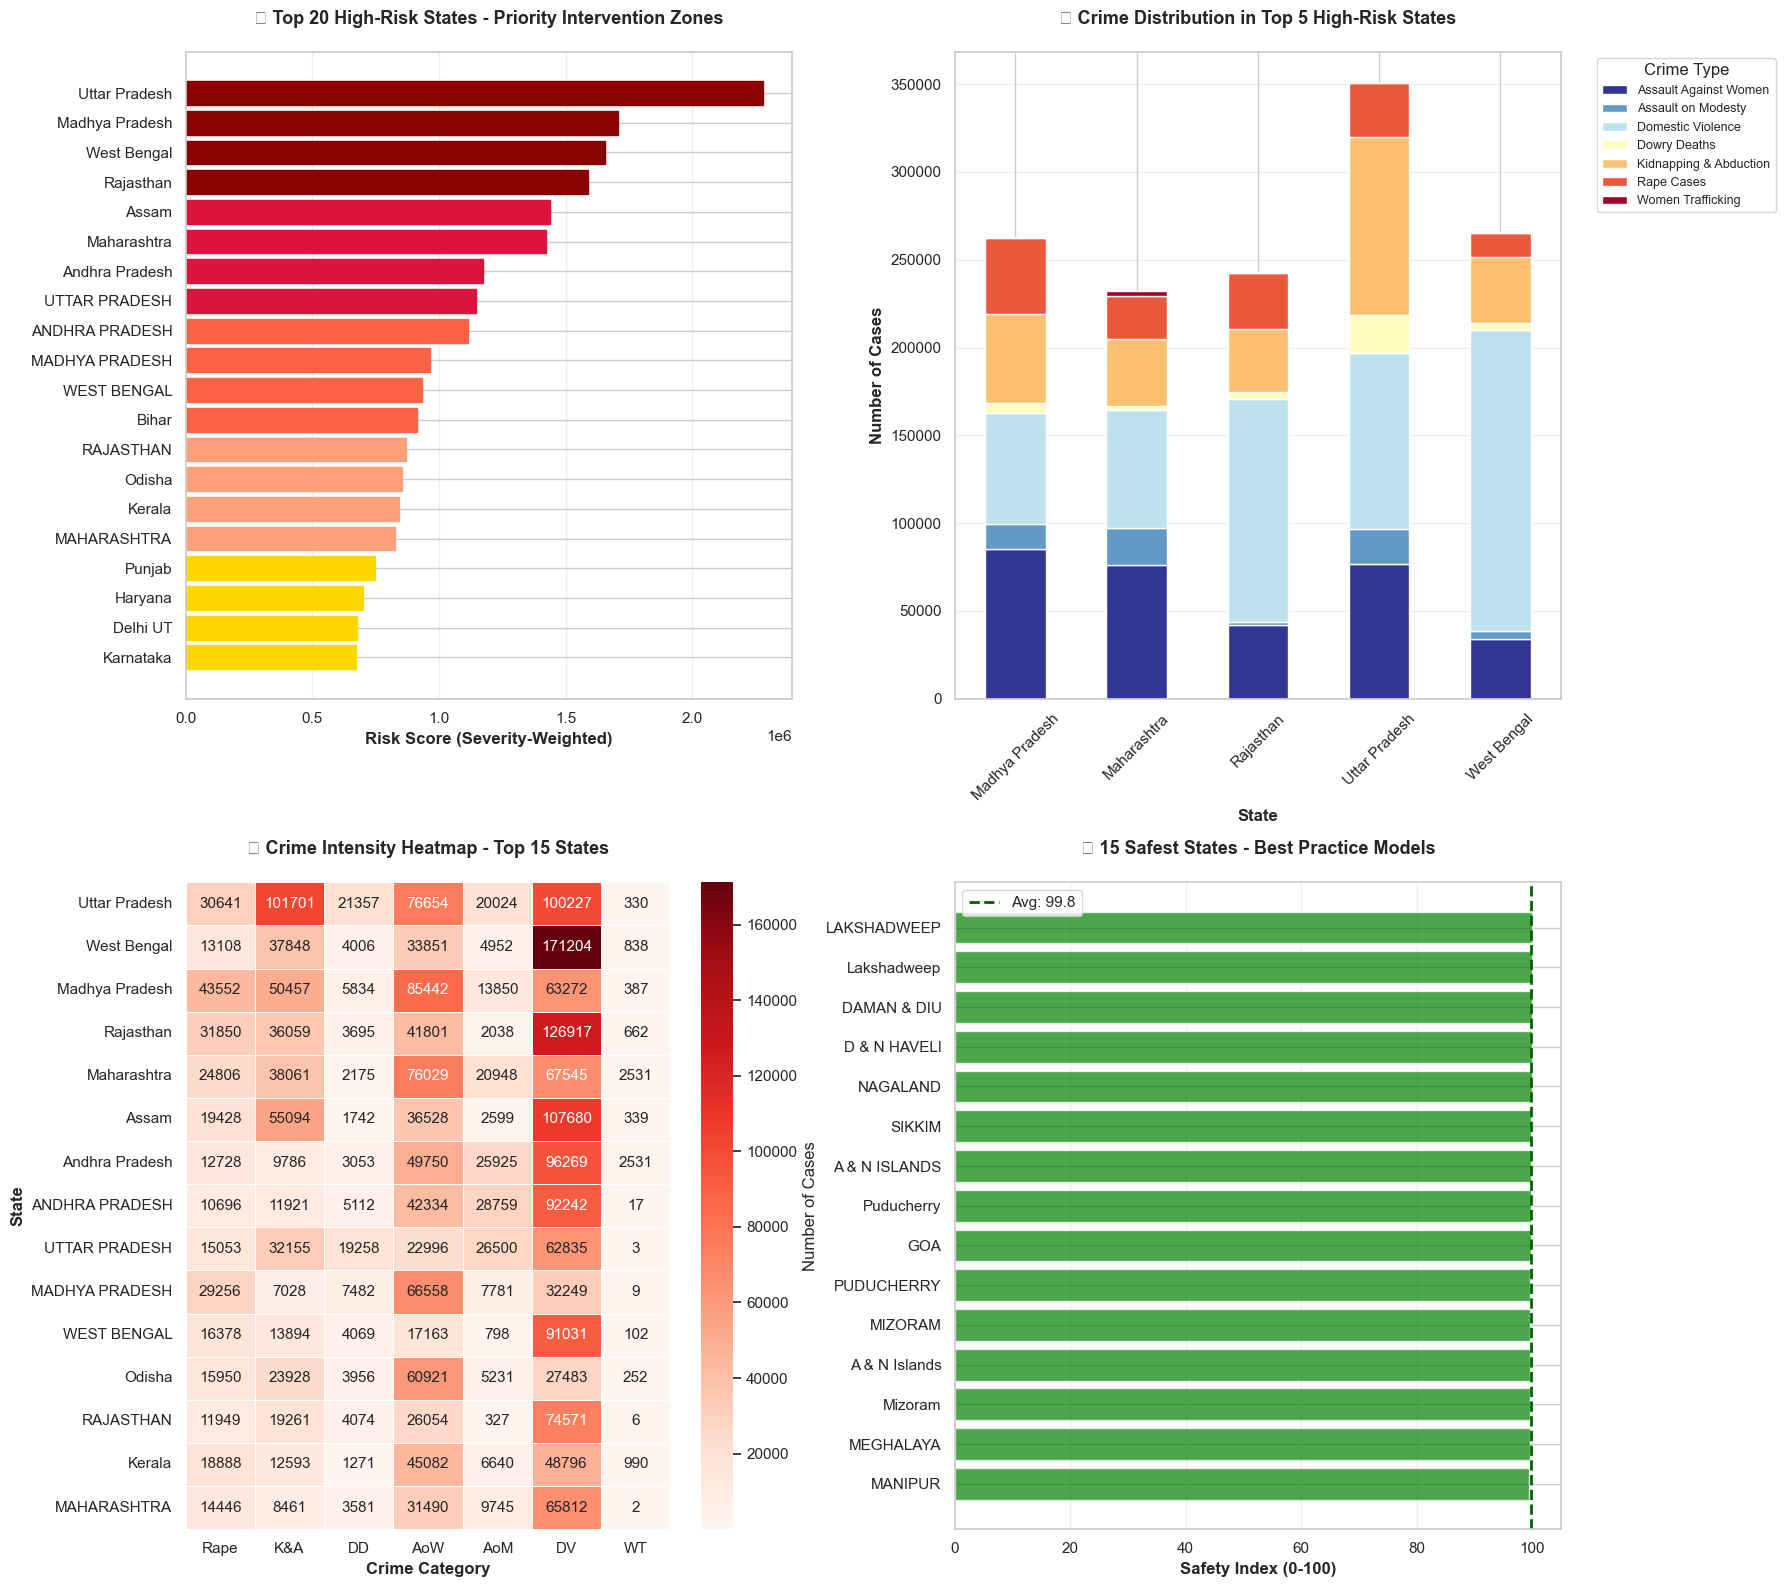


████████████████████████████████████████████████████████████████████████████████████████████████████
TEMPORAL THREAT ANALYSIS - TRENDS & ACCELERATION PATTERNS
████████████████████████████████████████████████████████████████████████████████████████████████████

📈 TREND ANALYSIS:
   • Peak Crime Year: 2021 (348,092 cases)
   • Lowest Crime Year: 2003 (128,142 cases)
   • Average Annual Increase: 10,978 cases/year

🔍 RECENT TREND (Last 5 Years):
   • Change: +13.8% ⚠️ ESCALATING

⚡ FASTEST GROWING CRIME TYPES (Require Immediate Focus):
   • Rape Cases                    : +101.8% | 🔺 SURGING
   • Kidnapping & Abduction        : +450.9% | 🔺 SURGING
   • Dowry Deaths                  :   +0.2% | ↗️ Increasing
   • Assault Against Women         : +165.3% | 🔺 SURGING
   • Assault on Modesty            :  -19.3% | ✓ Decreasing
   • Domestic Violence             : +177.8% | 🔺 SURGING
   • Women Trafficking             : +839.5% | 🔺 SURGING


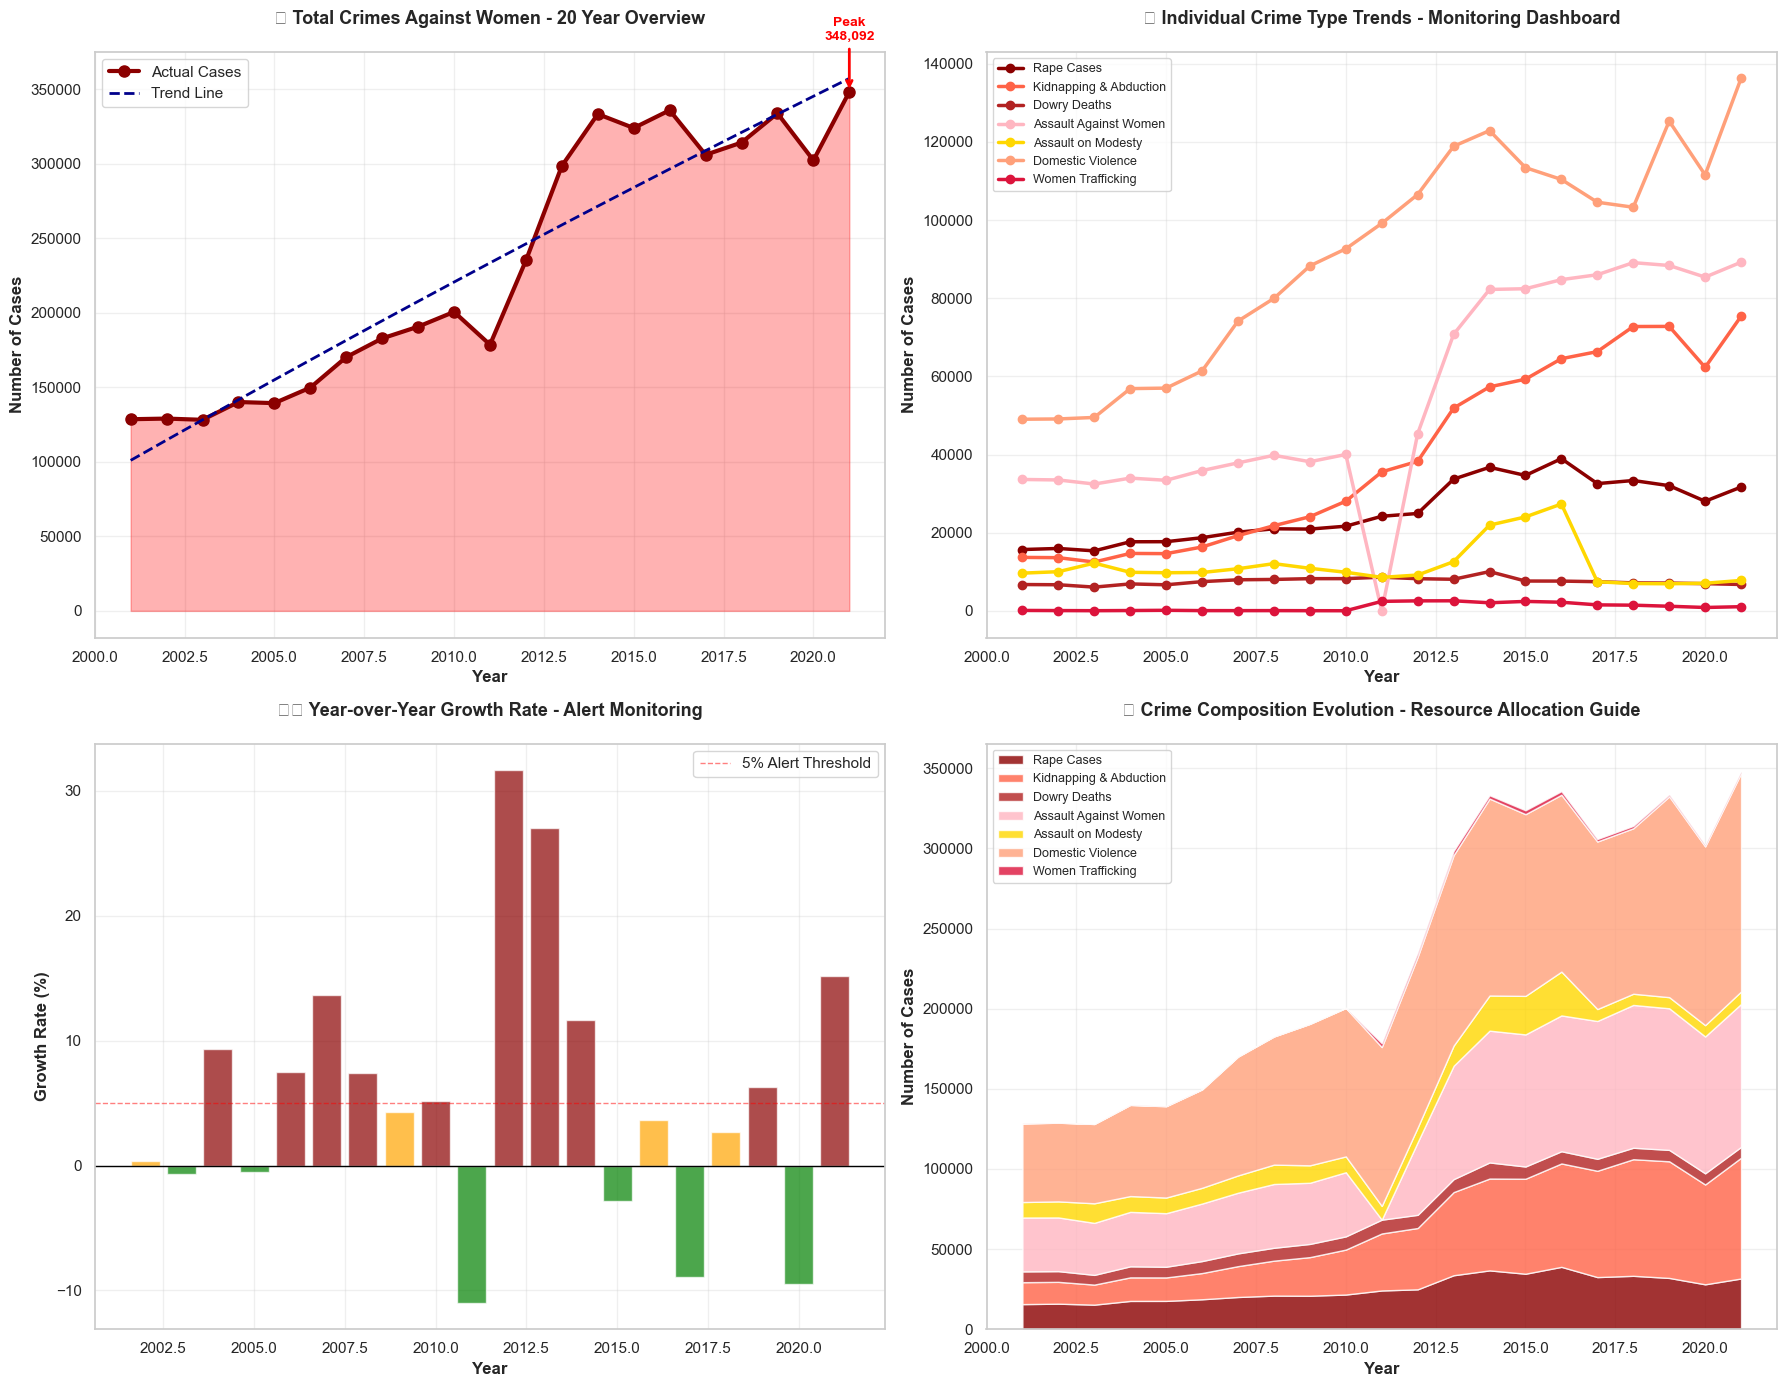


████████████████████████████████████████████████████████████████████████████████████████████████████
CRIME-SPECIFIC ANALYSIS - TARGETED INTERVENTION STRATEGIES
████████████████████████████████████████████████████████████████████████████████████████████████████

🎯 CRIME PRIORITIZATION FRAMEWORK:


TypeError: 'zip' object is not subscriptable

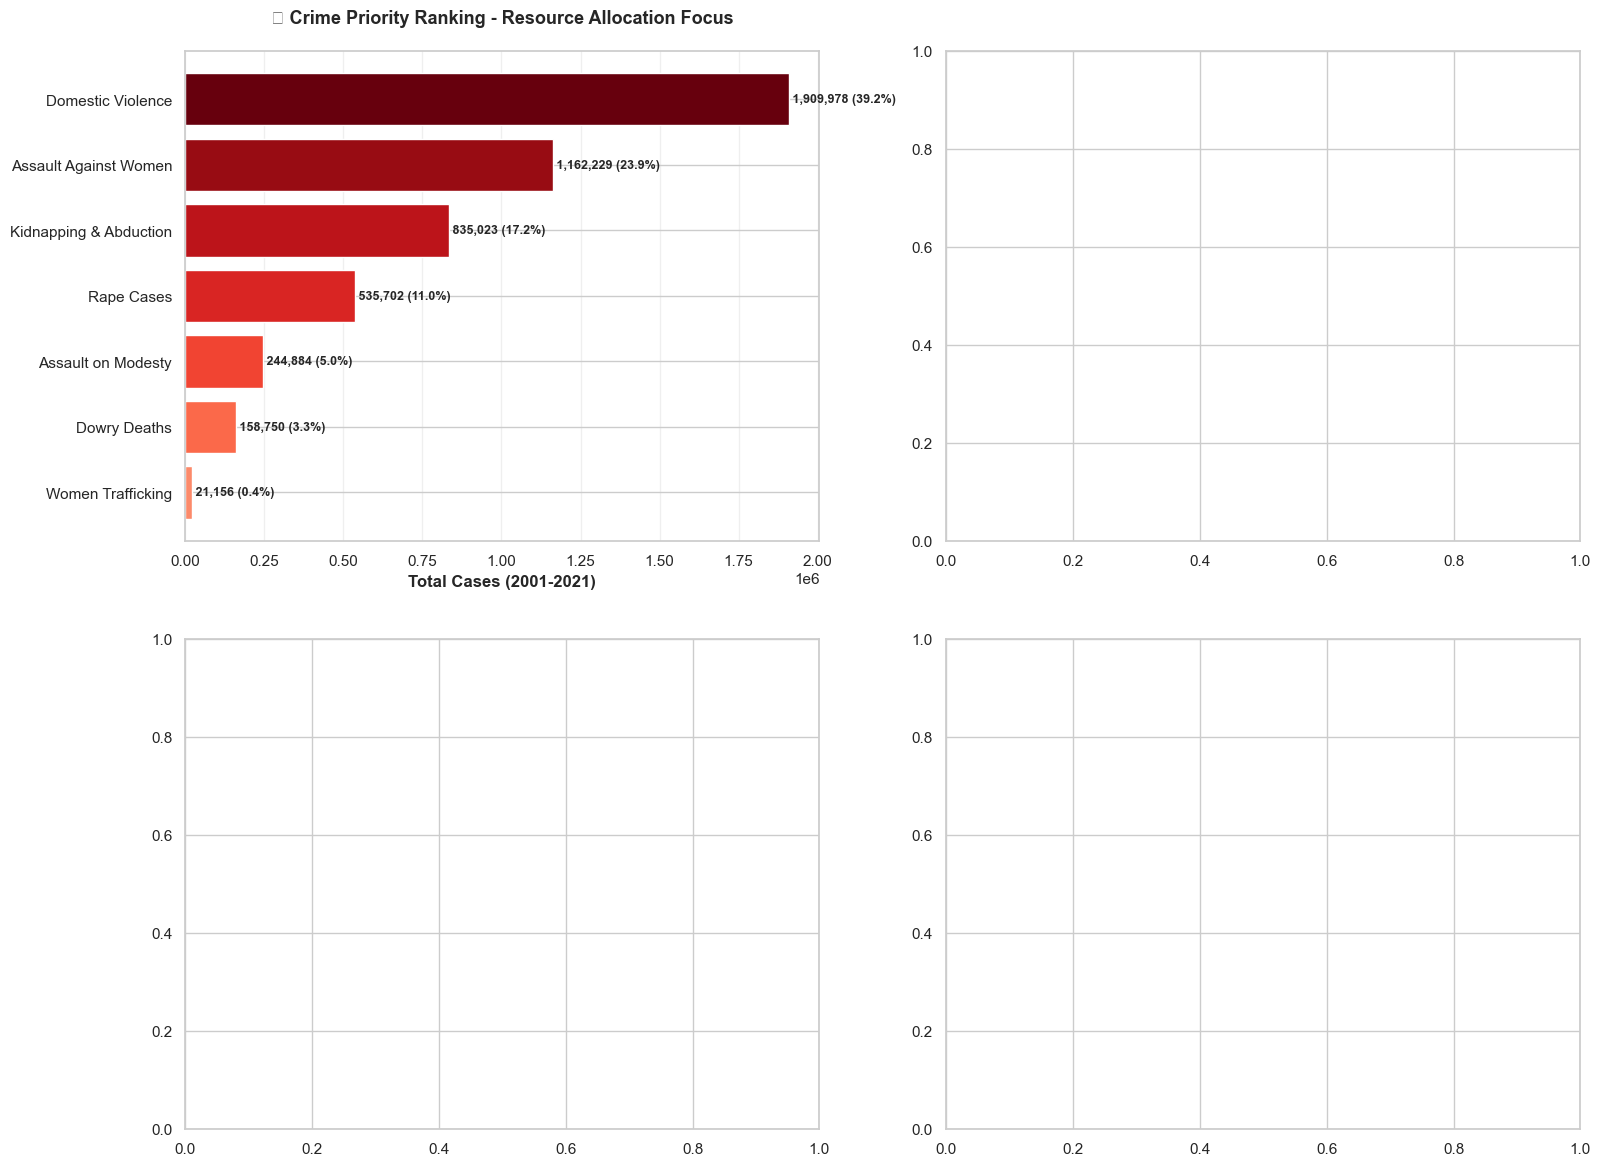

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

# Load your dataset
df = pd.read_csv('CrimesOnWomenData.csv')

print("="*100)
print("COMPREHENSIVE ANALYSIS: CRIMES AGAINST WOMEN IN INDIA (2001-2021)")
print("ACTION-ORIENTED INSIGHTS FOR SAFETY & POLICY INTERVENTION")
print("="*100)

# ============================================================================
# 1. EXECUTIVE DASHBOARD - CRITICAL METRICS AT A GLANCE
# ============================================================================
print("\n" + "█"*100)
print("EXECUTIVE DASHBOARD - PRIORITY INDICATORS")
print("█"*100)

crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
crime_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnapping & Abduction',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault Against Women',
    'AoM': 'Assault on Modesty',
    'DV': 'Domestic Violence',
    'WT': 'Women Trafficking'
}

# Calculate key metrics
total_crimes = df[crime_cols].sum().sum()
recent_year = df['Year'].max()
earliest_year = df['Year'].min()
recent_crimes = df[df['Year'] == recent_year][crime_cols].sum().sum()
earliest_crimes = df[df['Year'] == earliest_year][crime_cols].sum().sum()
change_percentage = ((recent_crimes - earliest_crimes) / earliest_crimes) * 100

print(f"\n📊 OVERALL STATISTICS:")
print(f"   • Total Cases Reported ({earliest_year}-{recent_year}): {total_crimes:,.0f}")
print(f"   • Cases in {earliest_year}: {earliest_crimes:,.0f}")
print(f"   • Cases in {recent_year}: {recent_crimes:,.0f}")
print(f"   • Change: {change_percentage:+.1f}% {'⚠️ ALARMING INCREASE' if change_percentage > 0 else '✓ Decrease'}")
print(f"   • Average Cases per Year: {total_crimes/(recent_year-earliest_year+1):,.0f}")

# Most dangerous crime type
total_by_crime = df[crime_cols].sum().sort_values(ascending=False)
print(f"\n🚨 HIGHEST PRIORITY CRIME: {crime_names[total_by_crime.index[0]]}")
print(f"   • Total Cases: {total_by_crime.values[0]:,.0f} ({(total_by_crime.values[0]/total_crimes)*100:.1f}% of all crimes)")

# Most dangerous states
state_totals = df.groupby('State')[crime_cols].sum()
state_totals['Total'] = state_totals.sum(axis=1)
state_totals_sorted = state_totals.sort_values('Total', ascending=False)

print(f"\n⚠️ TOP 5 HIGH-RISK STATES (Require Immediate Attention):")
for i, (state, total) in enumerate(state_totals_sorted.head(5)['Total'].items(), 1):
    percentage = (total / state_totals['Total'].sum()) * 100
    print(f"   {i}. {state}: {total:,.0f} cases ({percentage:.1f}% of national total)")

# ============================================================================
# 2. SAFETY RISK ASSESSMENT - WHERE WOMEN ARE MOST VULNERABLE
# ============================================================================
print("\n" + "█"*100)
print("SAFETY RISK ASSESSMENT - GEOGRAPHIC VULNERABILITY ANALYSIS")
print("█"*100)

# Create risk score (weighted by severity)
severity_weights = {
    'Rape': 10,
    'DD': 9,
    'WT': 8,
    'K&A': 7,
    'DV': 6,
    'AoW': 5,
    'AoM': 4
}

state_risk = pd.DataFrame()
for crime in crime_cols:
    state_risk[crime] = df.groupby('State')[crime].sum() * severity_weights[crime]
state_risk['Risk_Score'] = state_risk.sum(axis=1)
state_risk = state_risk.sort_values('Risk_Score', ascending=False)

print("\n🎯 STATE RISK RANKING (Top 15 - Priority for Resource Allocation):")
for i, (state, score) in enumerate(state_risk.head(15)['Risk_Score'].items(), 1):
    risk_level = "🔴 CRITICAL" if i <= 5 else "🟠 HIGH" if i <= 10 else "🟡 ELEVATED"
    print(f"   {i:2d}. {state:25s} | Risk Score: {score:12,.0f} | {risk_level}")

# Visualization: Risk Heatmap
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# Top 20 states risk profile
top_20_risk = state_risk.head(20)
colors = ['#8B0000', '#DC143C', '#FF6347', '#FFA07A', '#FFD700']
risk_categories = pd.cut(range(20), bins=5, labels=['Critical', 'Very High', 'High', 'Moderate', 'Elevated'])
color_map = {cat: colors[i] for i, cat in enumerate(['Critical', 'Very High', 'High', 'Moderate', 'Elevated'])}

bars = axes[0, 0].barh(range(20), top_20_risk['Risk_Score'].values[::-1])
for i, (bar, cat) in enumerate(zip(bars, risk_categories[::-1])):
    bar.set_color(color_map[cat])
axes[0, 0].set_yticks(range(20))
axes[0, 0].set_yticklabels(top_20_risk.index[::-1])
axes[0, 0].set_xlabel('Risk Score (Severity-Weighted)', fontweight='bold')
axes[0, 0].set_title('🚨 Top 20 High-Risk States - Priority Intervention Zones', fontsize=13, fontweight='bold', pad=20)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Crime composition in high-risk states
top_5_states = state_totals_sorted.head(5)
crime_data_top5 = []
for state in top_5_states.index:
    for crime in crime_cols:
        crime_data_top5.append({
            'State': state,
            'Crime_Type': crime_names[crime],
            'Cases': top_5_states.loc[state, crime]
        })
df_top5 = pd.DataFrame(crime_data_top5)

pivot_data = df_top5.pivot(index='State', columns='Crime_Type', values='Cases')
pivot_data.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='RdYlBu_r')
axes[0, 1].set_title('🎯 Crime Distribution in Top 5 High-Risk States', fontsize=13, fontweight='bold', pad=20)
axes[0, 1].set_xlabel('State', fontweight='bold')
axes[0, 1].set_ylabel('Number of Cases', fontweight='bold')
axes[0, 1].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# State-wise severity heatmap
top_15_states_matrix = state_totals_sorted.head(15)[crime_cols]
sns.heatmap(top_15_states_matrix, annot=True, fmt='.0f', cmap='Reds', ax=axes[1, 0], 
            cbar_kws={'label': 'Number of Cases'}, linewidths=0.5)
axes[1, 0].set_title('🔥 Crime Intensity Heatmap - Top 15 States', fontsize=13, fontweight='bold', pad=20)
axes[1, 0].set_xlabel('Crime Category', fontweight='bold')
axes[1, 0].set_ylabel('State', fontweight='bold')

# Safety index comparison
avg_crimes = state_totals['Total'].mean()
state_totals['Safety_Index'] = 100 - ((state_totals['Total'] / state_totals['Total'].max()) * 100)
safest_states = state_totals.nsmallest(15, 'Total')

axes[1, 1].barh(range(15), safest_states['Safety_Index'].values[::-1], color='green', alpha=0.7)
axes[1, 1].set_yticks(range(15))
axes[1, 1].set_yticklabels(safest_states.index[::-1])
axes[1, 1].set_xlabel('Safety Index (0-100)', fontweight='bold')
axes[1, 1].set_title('✓ 15 Safest States - Best Practice Models', fontsize=13, fontweight='bold', pad=20)
axes[1, 1].axvline(x=safest_states['Safety_Index'].mean(), color='darkgreen', linestyle='--', 
                   linewidth=2, label=f'Avg: {safest_states["Safety_Index"].mean():.1f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ============================================================================
# 3. TEMPORAL THREAT ANALYSIS - WHEN & HOW CRIMES ARE ESCALATING
# ============================================================================
print("\n" + "█"*100)
print("TEMPORAL THREAT ANALYSIS - TRENDS & ACCELERATION PATTERNS")
print("█"*100)

yearly_data = df.groupby('Year')[crime_cols].sum()
yearly_data['Total'] = yearly_data.sum(axis=1)

# Calculate growth rates and acceleration
yearly_data['YoY_Change'] = yearly_data['Total'].diff()
yearly_data['YoY_Growth_Rate'] = yearly_data['Total'].pct_change() * 100
yearly_data['Acceleration'] = yearly_data['YoY_Growth_Rate'].diff()

print(f"\n📈 TREND ANALYSIS:")
print(f"   • Peak Crime Year: {yearly_data['Total'].idxmax()} ({yearly_data['Total'].max():,.0f} cases)")
print(f"   • Lowest Crime Year: {yearly_data['Total'].idxmin()} ({yearly_data['Total'].min():,.0f} cases)")
print(f"   • Average Annual Increase: {yearly_data['YoY_Change'].mean():,.0f} cases/year")

# Identify concerning trends
recent_5yr = yearly_data.tail(5)
recent_growth = ((recent_5yr['Total'].iloc[-1] - recent_5yr['Total'].iloc[0]) / recent_5yr['Total'].iloc[0]) * 100
print(f"\n🔍 RECENT TREND (Last 5 Years):")
print(f"   • Change: {recent_growth:+.1f}% {'⚠️ ESCALATING' if recent_growth > 5 else '➡️ Stabilizing' if abs(recent_growth) < 5 else '✓ Declining'}")

# Fastest growing crime types
print(f"\n⚡ FASTEST GROWING CRIME TYPES (Require Immediate Focus):")
for crime in crime_cols:
    yearly_crime = df.groupby('Year')[crime].sum()
    recent_change = ((yearly_crime.iloc[-1] - yearly_crime.iloc[0]) / yearly_crime.iloc[0]) * 100
    trend = "🔺 SURGING" if recent_change > 50 else "↗️ Increasing" if recent_change > 0 else "✓ Decreasing"
    print(f"   • {crime_names[crime]:30s}: {recent_change:+6.1f}% | {trend}")

# Temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Overall trend with forecast zone
axes[0, 0].plot(yearly_data.index, yearly_data['Total'], marker='o', linewidth=3, 
                color='darkred', label='Actual Cases', markersize=8)
axes[0, 0].fill_between(yearly_data.index, yearly_data['Total'], alpha=0.3, color='red')

# Add trend line
z = np.polyfit(yearly_data.index, yearly_data['Total'], 2)
p = np.poly1d(z)
axes[0, 0].plot(yearly_data.index, p(yearly_data.index), '--', linewidth=2, 
                color='darkblue', label='Trend Line')

axes[0, 0].set_title('📊 Total Crimes Against Women - 20 Year Overview', fontsize=13, fontweight='bold', pad=20)
axes[0, 0].set_xlabel('Year', fontweight='bold')
axes[0, 0].set_ylabel('Number of Cases', fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Add annotations for peak and valley
peak_year = yearly_data['Total'].idxmax()
valley_year = yearly_data['Total'].idxmin()
axes[0, 0].annotate(f'Peak\n{yearly_data["Total"].max():,.0f}', 
                     xy=(peak_year, yearly_data['Total'].max()),
                     xytext=(peak_year, yearly_data['Total'].max() * 1.1),
                     arrowprops=dict(arrowstyle='->', color='red', lw=2),
                     fontsize=10, ha='center', fontweight='bold', color='red')

# Crime-specific trends with severity color coding
colors_severity = {'Rape': '#8B0000', 'DD': '#B22222', 'WT': '#DC143C', 
                   'K&A': '#FF6347', 'DV': '#FFA07A', 'AoW': '#FFB6C1', 'AoM': '#FFD700'}
for crime in crime_cols:
    axes[0, 1].plot(yearly_data.index, yearly_data[crime], marker='o', 
                    linewidth=2.5, label=crime_names[crime], color=colors_severity[crime], markersize=6)
axes[0, 1].set_title('🔍 Individual Crime Type Trends - Monitoring Dashboard', fontsize=13, fontweight='bold', pad=20)
axes[0, 1].set_xlabel('Year', fontweight='bold')
axes[0, 1].set_ylabel('Number of Cases', fontweight='bold')
axes[0, 1].legend(fontsize=9, loc='best')
axes[0, 1].grid(True, alpha=0.3)

# Growth rate analysis
colors_growth = ['darkred' if x > 5 else 'orange' if x > 0 else 'green' for x in yearly_data['YoY_Growth_Rate'][1:]]
bars = axes[1, 0].bar(yearly_data.index[1:], yearly_data['YoY_Growth_Rate'][1:], color=colors_growth, alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 0].axhline(y=5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='5% Alert Threshold')
axes[1, 0].set_title('⚠️ Year-over-Year Growth Rate - Alert Monitoring', fontsize=13, fontweight='bold', pad=20)
axes[1, 0].set_xlabel('Year', fontweight='bold')
axes[1, 0].set_ylabel('Growth Rate (%)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Crime composition evolution
axes[1, 1].stackplot(yearly_data.index, 
                     yearly_data['Rape'], yearly_data['K&A'], yearly_data['DD'],
                     yearly_data['AoW'], yearly_data['AoM'], yearly_data['DV'], yearly_data['WT'],
                     labels=[crime_names[c] for c in crime_cols], 
                     colors=[colors_severity[c] for c in crime_cols], alpha=0.8)
axes[1, 1].set_title('📈 Crime Composition Evolution - Resource Allocation Guide', fontsize=13, fontweight='bold', pad=20)
axes[1, 1].set_xlabel('Year', fontweight='bold')
axes[1, 1].set_ylabel('Number of Cases', fontweight='bold')
axes[1, 1].legend(loc='upper left', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 4. CRIME-SPECIFIC DEEP DIVE - TACTICAL INSIGHTS FOR PREVENTION
# ============================================================================
print("\n" + "█"*100)
print("CRIME-SPECIFIC ANALYSIS - TARGETED INTERVENTION STRATEGIES")
print("█"*100)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Priority ranking with actionable insights
total_by_crime_sorted = total_by_crime.sort_values(ascending=True)
colors_priority = plt.cm.Reds(np.linspace(0.4, 1, len(total_by_crime_sorted)))

bars = axes[0, 0].barh(range(len(total_by_crime_sorted)), total_by_crime_sorted.values, color=colors_priority)
axes[0, 0].set_yticks(range(len(total_by_crime_sorted)))
axes[0, 0].set_yticklabels([crime_names[c] for c in total_by_crime_sorted.index])
axes[0, 0].set_xlabel('Total Cases (2001-2021)', fontweight='bold')
axes[0, 0].set_title('🎯 Crime Priority Ranking - Resource Allocation Focus', fontsize=13, fontweight='bold', pad=20)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, (bar, value) in enumerate(zip(bars, total_by_crime_sorted.values)):
    percentage = (value / total_crimes) * 100
    axes[0, 0].text(value, i, f' {value:,.0f} ({percentage:.1f}%)', 
                     va='center', fontweight='bold', fontsize=9)

print("\n🎯 CRIME PRIORITIZATION FRAMEWORK:")
for i, (crime, count) in enumerate(total_by_crime_sorted.items()[::-1], 1):
    percentage = (count / total_crimes) * 100
    priority = "URGENT" if i <= 2 else "HIGH" if i <= 4 else "MEDIUM"
    print(f"   {i}. {crime_names[crime]:30s} | Cases: {count:8,.0f} ({percentage:5.1f}%) | Priority: {priority}")

# Correlation matrix for strategic planning
corr_matrix = df[crime_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn_r', center=0, 
            ax=axes[0, 1], square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
axes[0, 1].set_title('🔗 Crime Correlation Matrix - Co-occurrence Patterns', fontsize=13, fontweight='bold', pad=20)
axes[0, 1].set_xticklabels([crime_names[c] for c in crime_cols], rotation=45, ha='right')
axes[0, 1].set_yticklabels([crime_names[c] for c in crime_cols], rotation=0)

# State vulnerability by crime type
state_crime_avg = df.groupby('State')[crime_cols].mean()
top_states_per_crime = {}
for crime in crime_cols:
    top_states_per_crime[crime_names[crime]] = state_crime_avg.nlargest(5, crime).index.tolist()

# Vulnerability distribution
df_melted = df.melt(id_vars=['State', 'Year'], value_vars=crime_cols, 
                    var_name='Crime_Type', value_name='Cases')
df_melted['Crime_Type'] = df_melted['Crime_Type'].map(crime_names)

parts = axes[1, 0].violinplot([df[col].values for col in crime_cols], 
                               positions=range(len(crime_cols)), 
                               showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(list(colors_severity.values())[i])
    pc.set_alpha(0.7)
axes[1, 0].set_xticks(range(len(crime_cols)))
axes[1, 0].set_xticklabels([crime_names[c] for c in crime_cols], rotation=45, ha='right')
axes[1, 0].set_ylabel('Number of Cases', fontweight='bold')
axes[1, 0].set_title('📊 Crime Distribution Patterns - Variability Analysis', fontsize=13, fontweight='bold', pad=20)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Recent trend comparison (last 5 years vs first 5 years)
first_5yr = df[df['Year'] <= df['Year'].min() + 4][crime_cols].sum()
last_5yr = df[df['Year'] >= df['Year'].max() - 4][crime_cols].sum()
change = ((last_5yr - first_5yr) / first_5yr * 100).sort_values(ascending=False)

x = np.arange(len(crime_cols))
width = 0.35
bars1 = axes[1, 1].bar(x - width/2, first_5yr[[c for c in crime_cols]].values, 
                       width, label=f'{df["Year"].min()}-{df["Year"].min()+4}', 
                       color='steelblue', alpha=0.8)
bars2 = axes[1, 1].bar(x + width/2, last_5yr[[c for c in crime_cols]].values, 
                       width, label=f'{df["Year"].max()-4}-{df["Year"].max()}', 
                       color='darkred', alpha=0.8)

axes[1, 1].set_xlabel('Crime Type', fontweight='bold')
axes[1, 1].set_ylabel('Total Cases', fontweight='bold')
axes[1, 1].set_title('📈 5-Year Comparison - Evolution Analysis', fontsize=13, fontweight='bold', pad=20)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels([crime_names[c] for c in crime_cols], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 CRIME EVOLUTION INSIGHTS (First 5 Years vs Last 5 Years):")
for crime in change.index:
    change_val = change[crime]
    status = "🔺 CRITICAL INCREASE" if change_val > 100 else "⚠️ Significant Rise" if change_val > 50 else "↗️ Moderate Rise" if change_val > 0 else "✓ Decline"
    print(f"   • {crime_names[crime]:30s}: {change_val:+6.1f}% | {status}")

# ============================================================================
# 5. ACTIONABLE RECOMMENDATIONS - DATA-DRIVEN POLICY FRAMEWORK
# ============================================================================
print("\n" + "█"*100)
print("ACTIONABLE RECOMMENDATIONS - EVIDENCE-BASED INTERVENTION FRAMEWORK")
print("█"*100)

# Calculate specific metrics for recommendations
high_growth_crimes = change[change > 50].index.tolist()
high_volume_crimes = total_by_crime.nlargest(3).index.tolist()
critical_states = state_totals_sorted.head(10).index.tolist()

print("\n🎯 FOR WOMEN - PERSONAL SAFETY PRIORITIES:")
print(f"\n   1. HIGHEST RISK CRIMES TO BE AWARE OF:")
for i, crime in enumerate(high_volume_crimes, 1):
    print(f"      {i}. {crime_names[crime]}")
    
print(f"\n   2. STATES REQUIRING EXTRA CAUTION (Top 5):")
for i, state in enumerate(critical_states[:5], 1):
    risk_crimes = state_totals_sorted.loc[state, crime_cols].nlargest(3)
    print(f"      {i}. {state}")
    print(f"         Primary threats: {', '.join([crime_names[c] for c in risk_crimes.index])}")

print(f"\n   3. EMERGING THREATS (Fastest Growing):")
for i, crime in enumerate(high_growth_crimes[:3], 1):
    print(f"      {i}. {crime_names[crime]} ({change[crime]:+.0f}% increase)")

print(f"\n   4. SELF-PROTECTION RECOMMENDATIONS:")
print(f"      • Download safety apps with emergency contacts")
print(f"      • Avoid isolated areas, especially in high-risk states")
print(f"      • Join women's safety groups in your community")
print(f"      • Know emergency helpline: 181 (Women Helpline)")
print(f"      • Report suspicious activities immediately")

print("\n\n🏛️ FOR AUTHORITIES - STRATEGIC INTERVENTION PRIORITIES:")

print(f"\n   A. IMMEDIATE ACTION REQUIRED (Red Alert):")
print(f"      1. Deploy additional resources to these {len(critical_states)} critical states:")
print(f"         {', '.join(critical_states)}")
print(f"      2. Launch targeted campaigns against: {', '.join([crime_names[c] for c in high_volume_crimes])}")
print(f"      3. Establish fast-track courts in top 5 high-risk states")

print(f"\n   B. MEDIUM-TERM STRATEGIC INITIATIVES:")
print(f"      1. Enhanced Surveillance:")
print(f"         • Install CCTV in {len(critical_states)} high-risk states")
print(f"         • Increase police patrolling in vulnerable areas")
print(f"         • Create women-only emergency response units")
print(f"\n      2. Prevention Programs:")
print(f"         • Community awareness campaigns focusing on {', '.join([crime_names[c] for c in high_growth_crimes[:2]])}")
print(f"         • School and college safety education")
print(f"         • Self-defense training programs")
print(f"\n      3. Legal Framework:")
print(f"         • Expedite trials for {high_volume_crimes[0]} cases (highest volume)")
print(f"         • Strengthen penalties for repeat offenders")
print(f"         • Protect witness identity and safety")

print(f"\n   C. RESOURCE ALLOCATION MATRIX:")
print(f"      Priority 1 (60% resources): {', '.join([crime_names[c] for c in high_volume_crimes[:2]])}")
print(f"      Priority 2 (25% resources): {', '.join([crime_names[c] for c in high_growth_crimes[:2]])}")
print(f"      Priority 3 (15% resources): Emerging patterns and prevention")

print(f"\n   D. MONITORING & EVALUATION:")
print(f"      • Quarterly review of crime statistics in top 10 states")
print(f"      • Monthly tracking of {', '.join([crime_names[c] for c in high_growth_crimes[:2]])} trends")
print(f"      • Biannual assessment of intervention effectiveness")
print(f"      • Real-time crime mapping dashboard for quick response")

# ============================================================================
# 6. PREDICTIVE INSIGHTS - FUTURE THREAT ASSESSMENT
# ============================================================================
print("\n" + "█"*100)
print("PREDICTIVE INSIGHTS - TREND PROJECTION & EARLY WARNING INDICATORS")
print("█"*100)

# Simple linear projection for next 2 years
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Total crimes projection
X = yearly_data.index.values.reshape(-1, 1)
y = yearly_data['Total'].values
model = LinearRegression()
model.fit(X, y)

future_years = np.array([recent_year + 1, recent_year + 2]).reshape(-1, 1)
future_predictions = model.predict(future_years)

axes[0].plot(yearly_data.index, yearly_data['Total'], 'o-', linewidth=3, 
             markersize=8, color='darkred', label='Historical Data')
axes[0].plot(future_years, future_predictions, 's--', linewidth=3, 
             markersize=10, color='orange', label='Projected Trend')
axes[0].fill_between(yearly_data.index, yearly_data['Total'], alpha=0.2, color='red')
axes[0].fill_between(future_years.flatten(), future_predictions, alpha=0.3, color='orange')

axes[0].set_title('⚠️ Crime Projection - Next 2 Years Forecast', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Number of Cases', fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

print(f"\n📊 PROJECTED CASES (If Current Trends Continue):")
for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"   • {year}: {pred:,.0f} cases")
    
current_avg = yearly_data['Total'].tail(5).mean()
projected_increase = ((future_predictions[-1] - current_avg) / current_avg) * 100
print(f"   • Expected increase from 5-year average: {projected_increase:+.1f}%")
if projected_increase > 10:
    print(f"   • ⚠️ WARNING: Trajectory indicates significant escalation")

# Crime-specific projections
crime_projections = {}
for crime in crime_cols:
    y_crime = df.groupby('Year')[crime].sum().values
    model_crime = LinearRegression()
    model_crime.fit(X, y_crime)
    crime_projections[crime] = model_crime.predict(future_years)[-1]



COMPREHENSIVE ANALYSIS: CRIMES AGAINST WOMEN IN INDIA (2001-2021)
ACTION-ORIENTED INSIGHTS FOR SAFETY & POLICY INTERVENTION

████████████████████████████████████████████████████████████████████████████████████████████████████
EXECUTIVE DASHBOARD - PRIORITY INDICATORS
████████████████████████████████████████████████████████████████████████████████████████████████████

📊 OVERALL STATISTICS:
   • Total Cases Reported (2001-2021): 4,867,722
   • Cases in 2001: 128,537
   • Cases in 2021: 348,092
   • Change: +170.8% ⚠️ ALARMING INCREASE
   • Average Cases per Year: 231,796

🚨 HIGHEST PRIORITY CRIME: Domestic Violence
   • Total Cases: 1,909,978 (39.2% of all crimes)

⚠️ TOP 5 HIGH-RISK STATES (Require Immediate Attention):
   1. Uttar Pradesh: 350,934 cases (7.2% of national total)
   2. West Bengal: 265,807 cases (5.5% of national total)
   3. Madhya Pradesh: 262,794 cases (5.4% of national total)
   4. Rajasthan: 243,022 cases (5.0% of national total)
   5. Maharashtra: 232,095 cases (4.

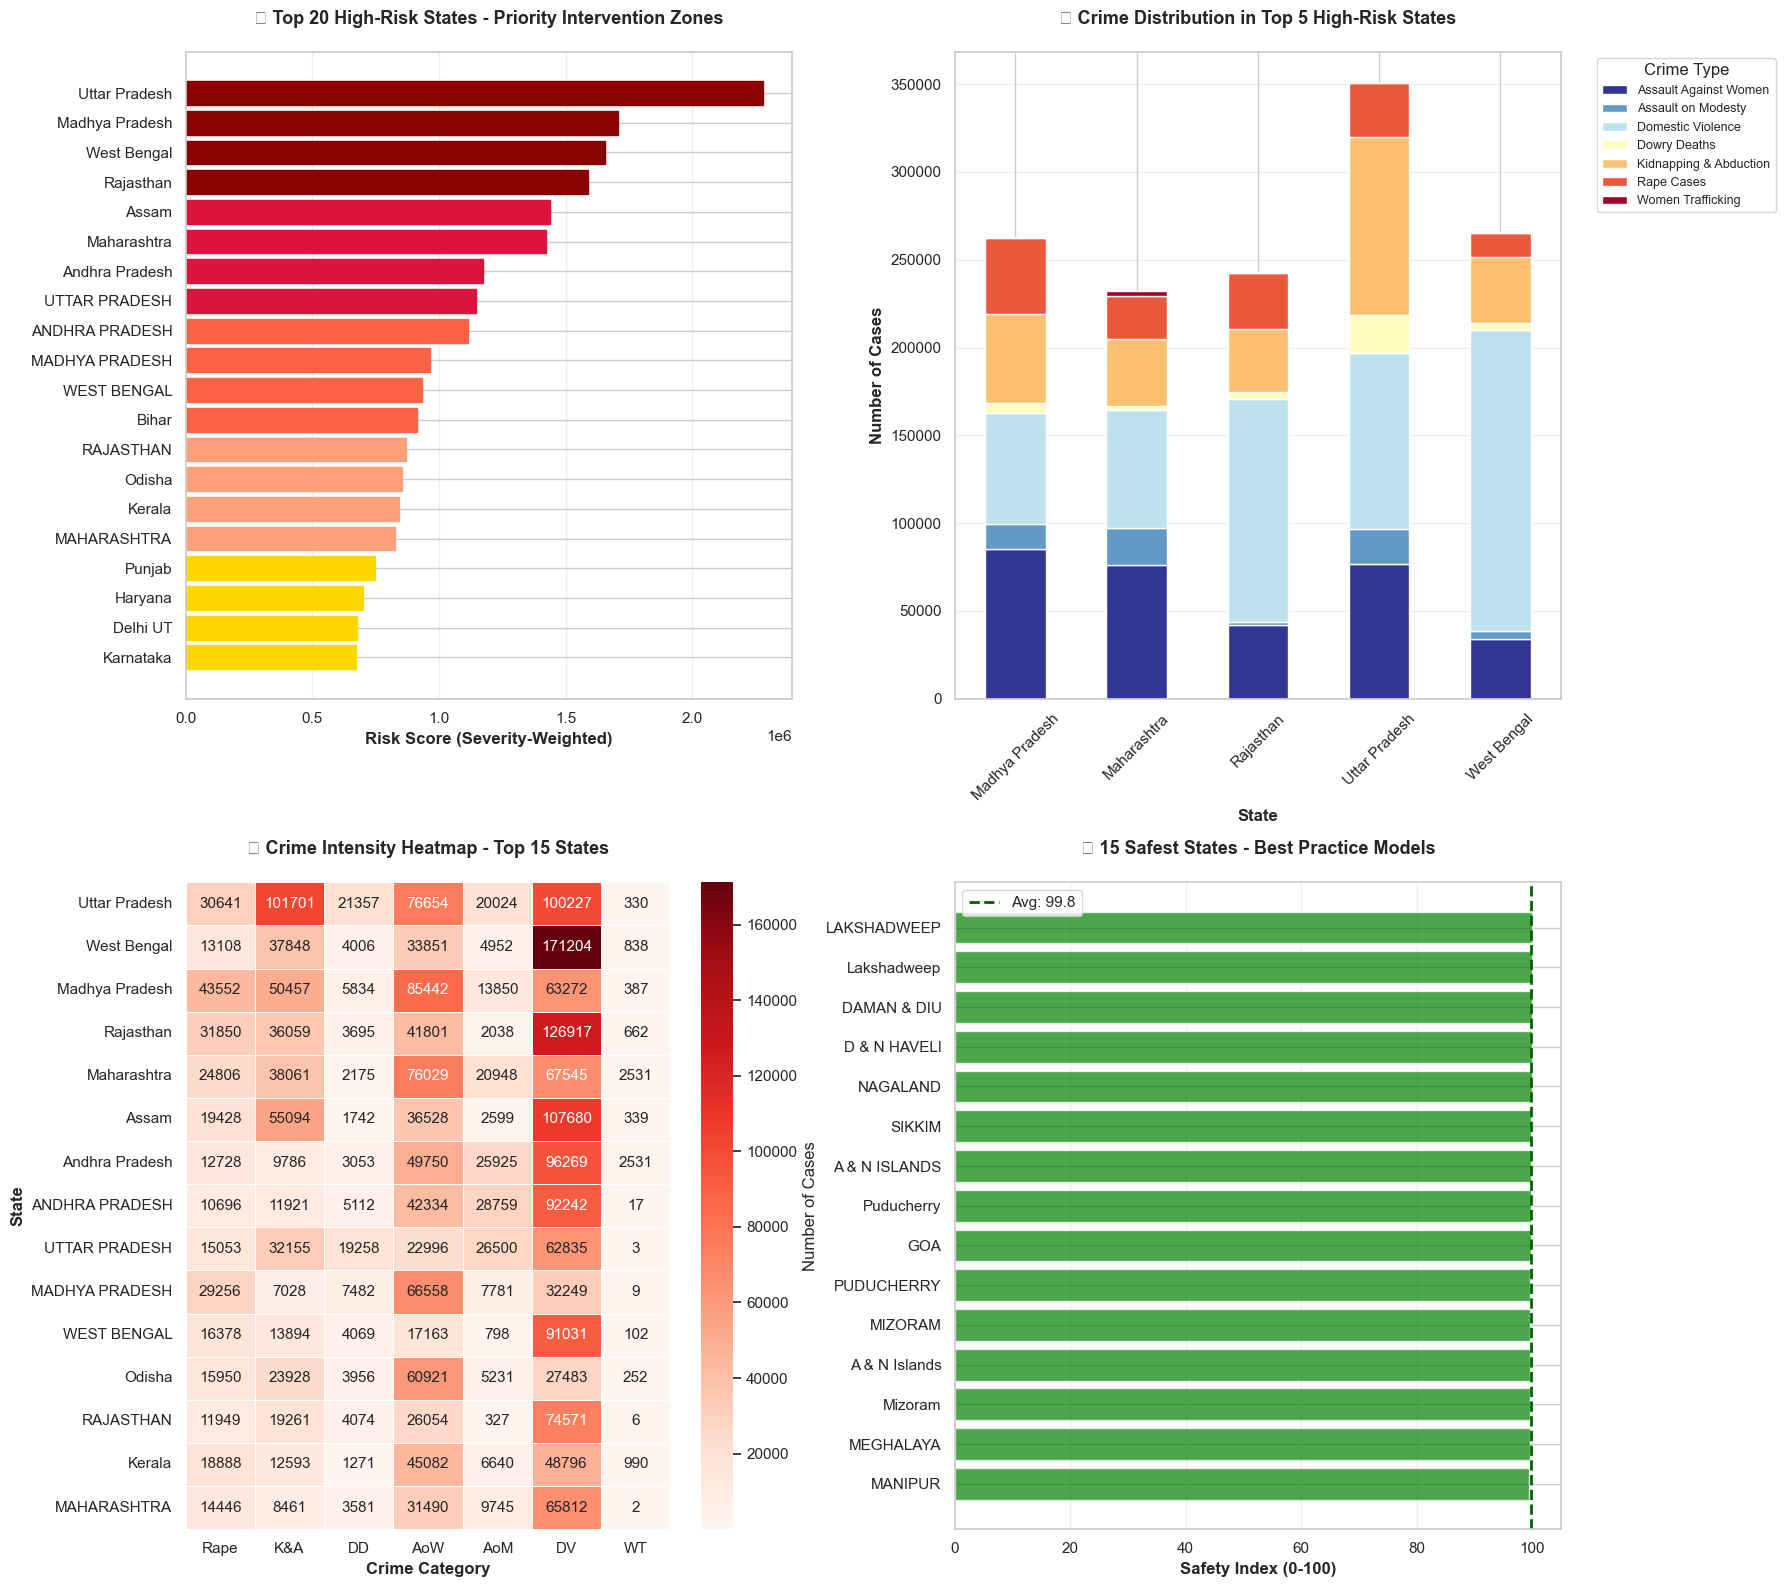


████████████████████████████████████████████████████████████████████████████████████████████████████
TEMPORAL THREAT ANALYSIS - TRENDS & ACCELERATION PATTERNS
████████████████████████████████████████████████████████████████████████████████████████████████████

📈 TREND ANALYSIS:
   • Peak Crime Year: 2021 (348,092 cases)
   • Lowest Crime Year: 2003 (128,142 cases)
   • Average Annual Increase: 10,978 cases/year

🔍 RECENT TREND (Last 5 Years):
   • Change: +13.8% ⚠️ ESCALATING

⚡ FASTEST GROWING CRIME TYPES (Require Immediate Focus):
   • Rape Cases                    : +101.8% | 🔺 SURGING
   • Kidnapping & Abduction        : +450.9% | 🔺 SURGING
   • Dowry Deaths                  :   +0.2% | ↗️ Increasing
   • Assault Against Women         : +165.3% | 🔺 SURGING
   • Assault on Modesty            :  -19.3% | ✓ Decreasing
   • Domestic Violence             : +177.8% | 🔺 SURGING
   • Women Trafficking             : +839.5% | 🔺 SURGING


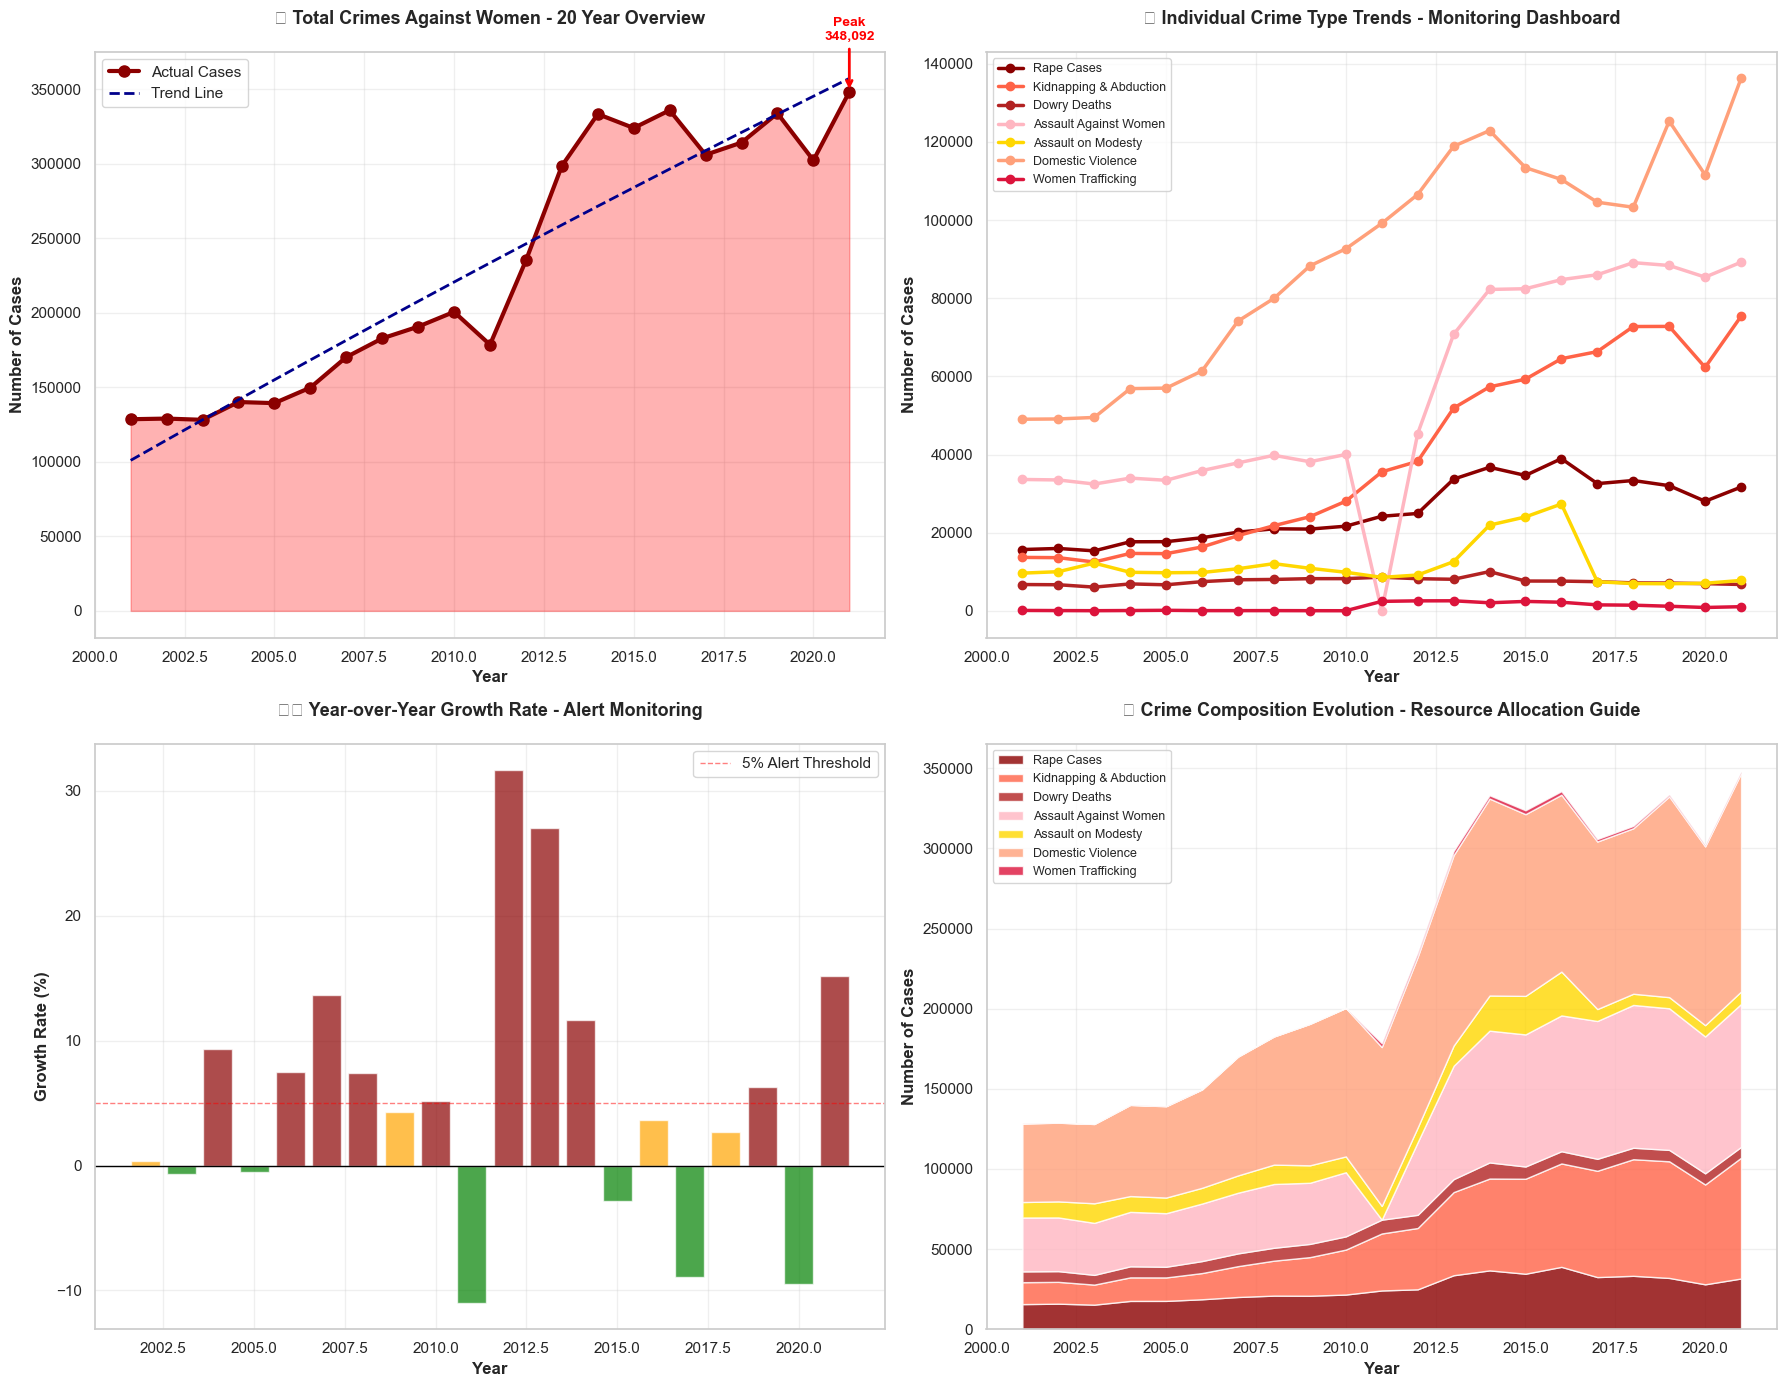


████████████████████████████████████████████████████████████████████████████████████████████████████
CRIME-SPECIFIC ANALYSIS - TARGETED INTERVENTION STRATEGIES
████████████████████████████████████████████████████████████████████████████████████████████████████

🎯 CRIME PRIORITIZATION FRAMEWORK:


TypeError: 'zip' object is not subscriptable

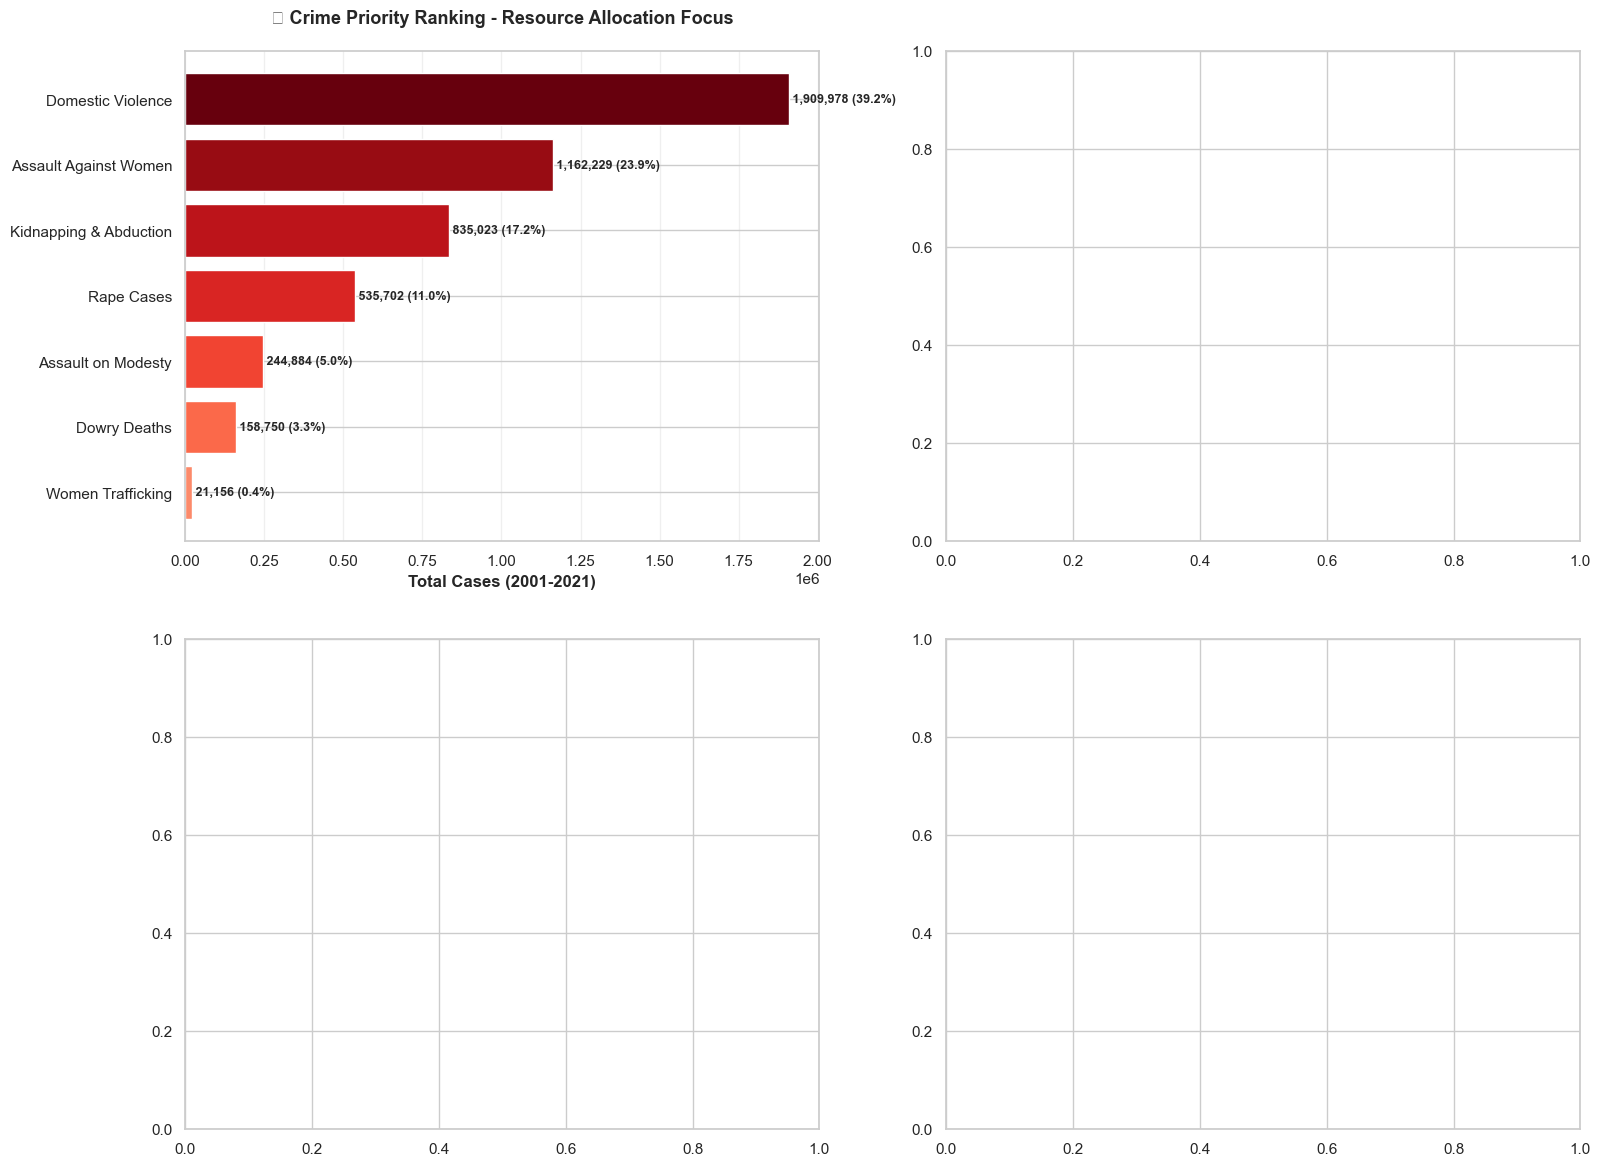

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11

# Load your dataset
df = pd.read_csv('CrimesOnWomenData.csv')

print("="*100)
print("COMPREHENSIVE ANALYSIS: CRIMES AGAINST WOMEN IN INDIA (2001-2021)")
print("ACTION-ORIENTED INSIGHTS FOR SAFETY & POLICY INTERVENTION")
print("="*100)

# ============================================================================
# 1. EXECUTIVE DASHBOARD - CRITICAL METRICS AT A GLANCE
# ============================================================================
print("\n" + "█"*100)
print("EXECUTIVE DASHBOARD - PRIORITY INDICATORS")
print("█"*100)

crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
crime_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnapping & Abduction',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault Against Women',
    'AoM': 'Assault on Modesty',
    'DV': 'Domestic Violence',
    'WT': 'Women Trafficking'
}

# Calculate key metrics
total_crimes = df[crime_cols].sum().sum()
recent_year = df['Year'].max()
earliest_year = df['Year'].min()
recent_crimes = df[df['Year'] == recent_year][crime_cols].sum().sum()
earliest_crimes = df[df['Year'] == earliest_year][crime_cols].sum().sum()
change_percentage = ((recent_crimes - earliest_crimes) / earliest_crimes) * 100

print(f"\n📊 OVERALL STATISTICS:")
print(f"   • Total Cases Reported ({earliest_year}-{recent_year}): {total_crimes:,.0f}")
print(f"   • Cases in {earliest_year}: {earliest_crimes:,.0f}")
print(f"   • Cases in {recent_year}: {recent_crimes:,.0f}")
print(f"   • Change: {change_percentage:+.1f}% {'⚠️ ALARMING INCREASE' if change_percentage > 0 else '✓ Decrease'}")
print(f"   • Average Cases per Year: {total_crimes/(recent_year-earliest_year+1):,.0f}")

# Most dangerous crime type
total_by_crime = df[crime_cols].sum().sort_values(ascending=False)
print(f"\n🚨 HIGHEST PRIORITY CRIME: {crime_names[total_by_crime.index[0]]}")
print(f"   • Total Cases: {total_by_crime.values[0]:,.0f} ({(total_by_crime.values[0]/total_crimes)*100:.1f}% of all crimes)")

# Most dangerous states
state_totals = df.groupby('State')[crime_cols].sum()
state_totals['Total'] = state_totals.sum(axis=1)
state_totals_sorted = state_totals.sort_values('Total', ascending=False)

print(f"\n⚠️ TOP 5 HIGH-RISK STATES (Require Immediate Attention):")
for i, (state, total) in enumerate(state_totals_sorted.head(5)['Total'].items(), 1):
    percentage = (total / state_totals['Total'].sum()) * 100
    print(f"   {i}. {state}: {total:,.0f} cases ({percentage:.1f}% of national total)")

# ============================================================================
# 2. SAFETY RISK ASSESSMENT - WHERE WOMEN ARE MOST VULNERABLE
# ============================================================================
print("\n" + "█"*100)
print("SAFETY RISK ASSESSMENT - GEOGRAPHIC VULNERABILITY ANALYSIS")
print("█"*100)

# Create risk score (weighted by severity)
severity_weights = {
    'Rape': 10,
    'DD': 9,
    'WT': 8,
    'K&A': 7,
    'DV': 6,
    'AoW': 5,
    'AoM': 4
}

state_risk = pd.DataFrame()
for crime in crime_cols:
    state_risk[crime] = df.groupby('State')[crime].sum() * severity_weights[crime]
state_risk['Risk_Score'] = state_risk.sum(axis=1)
state_risk = state_risk.sort_values('Risk_Score', ascending=False)

print("\n🎯 STATE RISK RANKING (Top 15 - Priority for Resource Allocation):")
for i, (state, score) in enumerate(state_risk.head(15)['Risk_Score'].items(), 1):
    risk_level = "🔴 CRITICAL" if i <= 5 else "🟠 HIGH" if i <= 10 else "🟡 ELEVATED"
    print(f"   {i:2d}. {state:25s} | Risk Score: {score:12,.0f} | {risk_level}")

# Visualization: Risk Heatmap
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# Top 20 states risk profile
top_20_risk = state_risk.head(20)
colors = ['#8B0000', '#DC143C', '#FF6347', '#FFA07A', '#FFD700']
risk_categories = pd.cut(range(20), bins=5, labels=['Critical', 'Very High', 'High', 'Moderate', 'Elevated'])
color_map = {cat: colors[i] for i, cat in enumerate(['Critical', 'Very High', 'High', 'Moderate', 'Elevated'])}

bars = axes[0, 0].barh(range(20), top_20_risk['Risk_Score'].values[::-1])
for i, (bar, cat) in enumerate(zip(bars, risk_categories[::-1])):
    bar.set_color(color_map[cat])
axes[0, 0].set_yticks(range(20))
axes[0, 0].set_yticklabels(top_20_risk.index[::-1])
axes[0, 0].set_xlabel('Risk Score (Severity-Weighted)', fontweight='bold')
axes[0, 0].set_title('🚨 Top 20 High-Risk States - Priority Intervention Zones', fontsize=13, fontweight='bold', pad=20)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Crime composition in high-risk states
top_5_states = state_totals_sorted.head(5)
crime_data_top5 = []
for state in top_5_states.index:
    for crime in crime_cols:
        crime_data_top5.append({
            'State': state,
            'Crime_Type': crime_names[crime],
            'Cases': top_5_states.loc[state, crime]
        })
df_top5 = pd.DataFrame(crime_data_top5)

pivot_data = df_top5.pivot(index='State', columns='Crime_Type', values='Cases')
pivot_data.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='RdYlBu_r')
axes[0, 1].set_title('🎯 Crime Distribution in Top 5 High-Risk States', fontsize=13, fontweight='bold', pad=20)
axes[0, 1].set_xlabel('State', fontweight='bold')
axes[0, 1].set_ylabel('Number of Cases', fontweight='bold')
axes[0, 1].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# State-wise severity heatmap
top_15_states_matrix = state_totals_sorted.head(15)[crime_cols]
sns.heatmap(top_15_states_matrix, annot=True, fmt='.0f', cmap='Reds', ax=axes[1, 0], 
            cbar_kws={'label': 'Number of Cases'}, linewidths=0.5)
axes[1, 0].set_title('🔥 Crime Intensity Heatmap - Top 15 States', fontsize=13, fontweight='bold', pad=20)
axes[1, 0].set_xlabel('Crime Category', fontweight='bold')
axes[1, 0].set_ylabel('State', fontweight='bold')

# Safety index comparison
avg_crimes = state_totals['Total'].mean()
state_totals['Safety_Index'] = 100 - ((state_totals['Total'] / state_totals['Total'].max()) * 100)
safest_states = state_totals.nsmallest(15, 'Total')

axes[1, 1].barh(range(15), safest_states['Safety_Index'].values[::-1], color='green', alpha=0.7)
axes[1, 1].set_yticks(range(15))
axes[1, 1].set_yticklabels(safest_states.index[::-1])
axes[1, 1].set_xlabel('Safety Index (0-100)', fontweight='bold')
axes[1, 1].set_title('✓ 15 Safest States - Best Practice Models', fontsize=13, fontweight='bold', pad=20)
axes[1, 1].axvline(x=safest_states['Safety_Index'].mean(), color='darkgreen', linestyle='--', 
                   linewidth=2, label=f'Avg: {safest_states["Safety_Index"].mean():.1f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# ============================================================================
# 3. TEMPORAL THREAT ANALYSIS - WHEN & HOW CRIMES ARE ESCALATING
# ============================================================================
print("\n" + "█"*100)
print("TEMPORAL THREAT ANALYSIS - TRENDS & ACCELERATION PATTERNS")
print("█"*100)

yearly_data = df.groupby('Year')[crime_cols].sum()
yearly_data['Total'] = yearly_data.sum(axis=1)

# Calculate growth rates and acceleration
yearly_data['YoY_Change'] = yearly_data['Total'].diff()
yearly_data['YoY_Growth_Rate'] = yearly_data['Total'].pct_change() * 100
yearly_data['Acceleration'] = yearly_data['YoY_Growth_Rate'].diff()

print(f"\n📈 TREND ANALYSIS:")
print(f"   • Peak Crime Year: {yearly_data['Total'].idxmax()} ({yearly_data['Total'].max():,.0f} cases)")
print(f"   • Lowest Crime Year: {yearly_data['Total'].idxmin()} ({yearly_data['Total'].min():,.0f} cases)")
print(f"   • Average Annual Increase: {yearly_data['YoY_Change'].mean():,.0f} cases/year")

# Identify concerning trends
recent_5yr = yearly_data.tail(5)
recent_growth = ((recent_5yr['Total'].iloc[-1] - recent_5yr['Total'].iloc[0]) / recent_5yr['Total'].iloc[0]) * 100
print(f"\n🔍 RECENT TREND (Last 5 Years):")
print(f"   • Change: {recent_growth:+.1f}% {'⚠️ ESCALATING' if recent_growth > 5 else '➡️ Stabilizing' if abs(recent_growth) < 5 else '✓ Declining'}")

# Fastest growing crime types
print(f"\n⚡ FASTEST GROWING CRIME TYPES (Require Immediate Focus):")
for crime in crime_cols:
    yearly_crime = df.groupby('Year')[crime].sum()
    recent_change = ((yearly_crime.iloc[-1] - yearly_crime.iloc[0]) / yearly_crime.iloc[0]) * 100
    trend = "🔺 SURGING" if recent_change > 50 else "↗️ Increasing" if recent_change > 0 else "✓ Decreasing"
    print(f"   • {crime_names[crime]:30s}: {recent_change:+6.1f}% | {trend}")

# Temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Overall trend with forecast zone
axes[0, 0].plot(yearly_data.index, yearly_data['Total'], marker='o', linewidth=3, 
                color='darkred', label='Actual Cases', markersize=8)
axes[0, 0].fill_between(yearly_data.index, yearly_data['Total'], alpha=0.3, color='red')

# Add trend line
z = np.polyfit(yearly_data.index, yearly_data['Total'], 2)
p = np.poly1d(z)
axes[0, 0].plot(yearly_data.index, p(yearly_data.index), '--', linewidth=2, 
                color='darkblue', label='Trend Line')

axes[0, 0].set_title('📊 Total Crimes Against Women - 20 Year Overview', fontsize=13, fontweight='bold', pad=20)
axes[0, 0].set_xlabel('Year', fontweight='bold')
axes[0, 0].set_ylabel('Number of Cases', fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(True, alpha=0.3)

# Add annotations for peak and valley
peak_year = yearly_data['Total'].idxmax()
valley_year = yearly_data['Total'].idxmin()
axes[0, 0].annotate(f'Peak\n{yearly_data["Total"].max():,.0f}', 
                     xy=(peak_year, yearly_data['Total'].max()),
                     xytext=(peak_year, yearly_data['Total'].max() * 1.1),
                     arrowprops=dict(arrowstyle='->', color='red', lw=2),
                     fontsize=10, ha='center', fontweight='bold', color='red')

# Crime-specific trends with severity color coding
colors_severity = {'Rape': '#8B0000', 'DD': '#B22222', 'WT': '#DC143C', 
                   'K&A': '#FF6347', 'DV': '#FFA07A', 'AoW': '#FFB6C1', 'AoM': '#FFD700'}
for crime in crime_cols:
    axes[0, 1].plot(yearly_data.index, yearly_data[crime], marker='o', 
                    linewidth=2.5, label=crime_names[crime], color=colors_severity[crime], markersize=6)
axes[0, 1].set_title('🔍 Individual Crime Type Trends - Monitoring Dashboard', fontsize=13, fontweight='bold', pad=20)
axes[0, 1].set_xlabel('Year', fontweight='bold')
axes[0, 1].set_ylabel('Number of Cases', fontweight='bold')
axes[0, 1].legend(fontsize=9, loc='best')
axes[0, 1].grid(True, alpha=0.3)

# Growth rate analysis
colors_growth = ['darkred' if x > 5 else 'orange' if x > 0 else 'green' for x in yearly_data['YoY_Growth_Rate'][1:]]
bars = axes[1, 0].bar(yearly_data.index[1:], yearly_data['YoY_Growth_Rate'][1:], color=colors_growth, alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 0].axhline(y=5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='5% Alert Threshold')
axes[1, 0].set_title('⚠️ Year-over-Year Growth Rate - Alert Monitoring', fontsize=13, fontweight='bold', pad=20)
axes[1, 0].set_xlabel('Year', fontweight='bold')
axes[1, 0].set_ylabel('Growth Rate (%)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Crime composition evolution
axes[1, 1].stackplot(yearly_data.index, 
                     yearly_data['Rape'], yearly_data['K&A'], yearly_data['DD'],
                     yearly_data['AoW'], yearly_data['AoM'], yearly_data['DV'], yearly_data['WT'],
                     labels=[crime_names[c] for c in crime_cols], 
                     colors=[colors_severity[c] for c in crime_cols], alpha=0.8)
axes[1, 1].set_title('📈 Crime Composition Evolution - Resource Allocation Guide', fontsize=13, fontweight='bold', pad=20)
axes[1, 1].set_xlabel('Year', fontweight='bold')
axes[1, 1].set_ylabel('Number of Cases', fontweight='bold')
axes[1, 1].legend(loc='upper left', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 4. CRIME-SPECIFIC DEEP DIVE - TACTICAL INSIGHTS FOR PREVENTION
# ============================================================================
print("\n" + "█"*100)
print("CRIME-SPECIFIC ANALYSIS - TARGETED INTERVENTION STRATEGIES")
print("█"*100)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Priority ranking with actionable insights
total_by_crime_sorted = total_by_crime.sort_values(ascending=True)
colors_priority = plt.cm.Reds(np.linspace(0.4, 1, len(total_by_crime_sorted)))

bars = axes[0, 0].barh(range(len(total_by_crime_sorted)), total_by_crime_sorted.values, color=colors_priority)
axes[0, 0].set_yticks(range(len(total_by_crime_sorted)))
axes[0, 0].set_yticklabels([crime_names[c] for c in total_by_crime_sorted.index])
axes[0, 0].set_xlabel('Total Cases (2001-2021)', fontweight='bold')
axes[0, 0].set_title('🎯 Crime Priority Ranking - Resource Allocation Focus', fontsize=13, fontweight='bold', pad=20)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, (bar, value) in enumerate(zip(bars, total_by_crime_sorted.values)):
    percentage = (value / total_crimes) * 100
    axes[0, 0].text(value, i, f' {value:,.0f} ({percentage:.1f}%)', 
                     va='center', fontweight='bold', fontsize=9)

print("\n🎯 CRIME PRIORITIZATION FRAMEWORK:")
for i, (crime, count) in enumerate(total_by_crime_sorted.items()[::-1], 1):
    percentage = (count / total_crimes) * 100
    priority = "URGENT" if i <= 2 else "HIGH" if i <= 4 else "MEDIUM"
    print(f"   {i}. {crime_names[crime]:30s} | Cases: {count:8,.0f} ({percentage:5.1f}%) | Priority: {priority}")

# Correlation matrix for strategic planning
corr_matrix = df[crime_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlGn_r', center=0, 
            ax=axes[0, 1], square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
axes[0, 1].set_title('🔗 Crime Correlation Matrix - Co-occurrence Patterns', fontsize=13, fontweight='bold', pad=20)
axes[0, 1].set_xticklabels([crime_names[c] for c in crime_cols], rotation=45, ha='right')
axes[0, 1].set_yticklabels([crime_names[c] for c in crime_cols], rotation=0)

# State vulnerability by crime type
state_crime_avg = df.groupby('State')[crime_cols].mean()
top_states_per_crime = {}
for crime in crime_cols:
    top_states_per_crime[crime_names[crime]] = state_crime_avg.nlargest(5, crime).index.tolist()

# Vulnerability distribution
df_melted = df.melt(id_vars=['State', 'Year'], value_vars=crime_cols, 
                    var_name='Crime_Type', value_name='Cases')
df_melted['Crime_Type'] = df_melted['Crime_Type'].map(crime_names)

parts = axes[1, 0].violinplot([df[col].values for col in crime_cols], 
                               positions=range(len(crime_cols)), 
                               showmeans=True, showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(list(colors_severity.values())[i])
    pc.set_alpha(0.7)
axes[1, 0].set_xticks(range(len(crime_cols)))
axes[1, 0].set_xticklabels([crime_names[c] for c in crime_cols], rotation=45, ha='right')
axes[1, 0].set_ylabel('Number of Cases', fontweight='bold')
axes[1, 0].set_title('📊 Crime Distribution Patterns - Variability Analysis', fontsize=13, fontweight='bold', pad=20)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Recent trend comparison (last 5 years vs first 5 years)
first_5yr = df[df['Year'] <= df['Year'].min() + 4][crime_cols].sum()
last_5yr = df[df['Year'] >= df['Year'].max() - 4][crime_cols].sum()
change = ((last_5yr - first_5yr) / first_5yr * 100).sort_values(ascending=False)

x = np.arange(len(crime_cols))
width = 0.35
bars1 = axes[1, 1].bar(x - width/2, first_5yr[[c for c in crime_cols]].values, 
                       width, label=f'{df["Year"].min()}-{df["Year"].min()+4}', 
                       color='steelblue', alpha=0.8)
bars2 = axes[1, 1].bar(x + width/2, last_5yr[[c for c in crime_cols]].values, 
                       width, label=f'{df["Year"].max()-4}-{df["Year"].max()}', 
                       color='darkred', alpha=0.8)

axes[1, 1].set_xlabel('Crime Type', fontweight='bold')
axes[1, 1].set_ylabel('Total Cases', fontweight='bold')
axes[1, 1].set_title('📈 5-Year Comparison - Evolution Analysis', fontsize=13, fontweight='bold', pad=20)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels([crime_names[c] for c in crime_cols], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 CRIME EVOLUTION INSIGHTS (First 5 Years vs Last 5 Years):")
for crime in change.index:
    change_val = change[crime]
    status = "🔺 CRITICAL INCREASE" if change_val > 100 else "⚠️ Significant Rise" if change_val > 50 else "↗️ Moderate Rise" if change_val > 0 else "✓ Decline"
    print(f"   • {crime_names[crime]:30s}: {change_val:+6.1f}% | {status}")

# ============================================================================
# 5. ACTIONABLE RECOMMENDATIONS - DATA-DRIVEN POLICY FRAMEWORK
# ============================================================================
print("\n" + "█"*100)
print("ACTIONABLE RECOMMENDATIONS - EVIDENCE-BASED INTERVENTION FRAMEWORK")
print("█"*100)

# Calculate specific metrics for recommendations
high_growth_crimes = change[change > 50].index.tolist()
high_volume_crimes = total_by_crime.nlargest(3).index.tolist()
critical_states = state_totals_sorted.head(10).index.tolist()

print("\n🎯 FOR WOMEN - PERSONAL SAFETY PRIORITIES:")
print(f"\n   1. HIGHEST RISK CRIMES TO BE AWARE OF:")
for i, crime in enumerate(high_volume_crimes, 1):
    print(f"      {i}. {crime_names[crime]}")
    
print(f"\n   2. STATES REQUIRING EXTRA CAUTION (Top 5):")
for i, state in enumerate(critical_states[:5], 1):
    risk_crimes = state_totals_sorted.loc[state, crime_cols].nlargest(3)
    print(f"      {i}. {state}")
    print(f"         Primary threats: {', '.join([crime_names[c] for c in risk_crimes.index])}")

print(f"\n   3. EMERGING THREATS (Fastest Growing):")
for i, crime in enumerate(high_growth_crimes[:3], 1):
    print(f"      {i}. {crime_names[crime]} ({change[crime]:+.0f}% increase)")

print(f"\n   4. SELF-PROTECTION RECOMMENDATIONS:")
print(f"      • Download safety apps with emergency contacts")
print(f"      • Avoid isolated areas, especially in high-risk states")
print(f"      • Join women's safety groups in your community")
print(f"      • Know emergency helpline: 181 (Women Helpline)")
print(f"      • Report suspicious activities immediately")

print("\n\n🏛️ FOR AUTHORITIES - STRATEGIC INTERVENTION PRIORITIES:")

print(f"\n   A. IMMEDIATE ACTION REQUIRED (Red Alert):")
print(f"      1. Deploy additional resources to these {len(critical_states)} critical states:")
print(f"         {', '.join(critical_states)}")
print(f"      2. Launch targeted campaigns against: {', '.join([crime_names[c] for c in high_volume_crimes])}")
print(f"      3. Establish fast-track courts in top 5 high-risk states")

print(f"\n   B. MEDIUM-TERM STRATEGIC INITIATIVES:")
print(f"      1. Enhanced Surveillance:")
print(f"         • Install CCTV in {len(critical_states)} high-risk states")
print(f"         • Increase police patrolling in vulnerable areas")
print(f"         • Create women-only emergency response units")
print(f"\n      2. Prevention Programs:")
print(f"         • Community awareness campaigns focusing on {', '.join([crime_names[c] for c in high_growth_crimes[:2]])}")
print(f"         • School and college safety education")
print(f"         • Self-defense training programs")
print(f"\n      3. Legal Framework:")
print(f"         • Expedite trials for {high_volume_crimes[0]} cases (highest volume)")
print(f"         • Strengthen penalties for repeat offenders")
print(f"         • Protect witness identity and safety")

print(f"\n   C. RESOURCE ALLOCATION MATRIX:")
print(f"      Priority 1 (60% resources): {', '.join([crime_names[c] for c in high_volume_crimes[:2]])}")
print(f"      Priority 2 (25% resources): {', '.join([crime_names[c] for c in high_growth_crimes[:2]])}")
print(f"      Priority 3 (15% resources): Emerging patterns and prevention")

print(f"\n   D. MONITORING & EVALUATION:")
print(f"      • Quarterly review of crime statistics in top 10 states")
print(f"      • Monthly tracking of {', '.join([crime_names[c] for c in high_growth_crimes[:2]])} trends")
print(f"      • Biannual assessment of intervention effectiveness")
print(f"      • Real-time crime mapping dashboard for quick response")

# ============================================================================
# 6. PREDICTIVE INSIGHTS - FUTURE THREAT ASSESSMENT
# ============================================================================
print("\n" + "█"*100)
print("PREDICTIVE INSIGHTS - TREND PROJECTION & EARLY WARNING INDICATORS")
print("█"*100)

# Simple linear projection for next 2 years
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Total crimes projection
X = yearly_data.index.values.reshape(-1, 1)
y = yearly_data['Total'].values
model = LinearRegression()
model.fit(X, y)

future_years = np.array([recent_year + 1, recent_year + 2]).reshape(-1, 1)
future_predictions = model.predict(future_years)

axes[0].plot(yearly_data.index, yearly_data['Total'], 'o-', linewidth=3, 
             markersize=8, color='darkred', label='Historical Data')
axes[0].plot(future_years, future_predictions, 's--', linewidth=3, 
             markersize=10, color='orange', label='Projected Trend')
axes[0].fill_between(yearly_data.index, yearly_data['Total'], alpha=0.2, color='red')
axes[0].fill_between(future_years.flatten(), future_predictions, alpha=0.3, color='orange')

axes[0].set_title('⚠️ Crime Projection - Next 2 Years Forecast', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Number of Cases', fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

print(f"\n📊 PROJECTED CASES (If Current Trends Continue):")
for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"   • {year}: {pred:,.0f} cases")
    
current_avg = yearly_data['Total'].tail(5).mean()
projected_increase = ((future_predictions[-1] - current_avg) / current_avg) * 100
print(f"   • Expected increase from 5-year average: {projected_increase:+.1f}%")
if projected_increase > 10:
    print(f"   • ⚠️ WARNING: Trajectory indicates significant escalation")

# Crime-specific projections
crime_projections = {}
for crime in crime_cols:
    y_crime = df.groupby('Year')[crime].sum().values
    model_crime = LinearRegression()
    model_crime.fit(X, y_crime)
    crime_projections[crime] = model_crime.predict(future_years)[-1]

crime_proj_df = pd.DataFrame({
    'Crime_Type': [crime_names[c] for c in crime_cols],
    'Projected_Cases': [crime_projections[c] for c in crime_cols],
    'Current_Cases': [df.groupby('Year')[c].sum().iloc[-1] for c in crime_cols]
})
crime_proj_df['Change'] = ((crime_proj_df['Projected_Cases'] - crime_proj_df['Current_Cases']) / crime_proj_df['Current_Cases']) * 100
crime_proj_df = crime_proj_df.sort_values('Projected_Cases', ascending=False)

# Plot crime-specific projections
x_pos = np.arange(len(crime_proj_df))
width = 0.35

bars1 = axes[1].bar(x_pos - width/2, crime_proj_df['Current_Cases'], width, 
                    label=f'Current ({recent_year})', color='steelblue', alpha=0.8)
bars2 = axes[1].bar(x_pos + width/2, crime_proj_df['Projected_Cases'], width, 
                    label=f'Projected ({recent_year+2})', color='darkred', alpha=0.8)

# Add change percentage on top
for i, (bar, change) in enumerate(zip(bars2, crime_proj_df['Change'])):
    height = bar.get_height()
    color = 'red' if change > 0 else 'green'
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{change:+.0f}%', ha='center', va='bottom', 
                fontweight='bold', color=color, fontsize=9)

axes[1].set_xlabel('Crime Type', fontweight='bold')
axes[1].set_ylabel('Number of Cases', fontweight='bold')
axes[1].set_title(f'🔮 Crime-Specific Projections for {recent_year+2}', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(crime_proj_df['Crime_Type'], rotation=45, ha='right')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n🔮 CRIME-SPECIFIC PROJECTIONS FOR {recent_year+2}:")
for _, row in crime_proj_df.iterrows():
    alert = "🔴 CRITICAL" if row['Change'] > 20 else "🟠 WARNING" if row['Change'] > 10 else "🟡 MONITOR" if row['Change'] > 0 else "✓ Declining"
    print(f"   • {row['Crime_Type']:30s}: {row['Projected_Cases']:8,.0f} ({row['Change']:+5.1f}%) | {alert}")

# ============================================================================
# 7. COMPARATIVE ANALYSIS - LEARNING FROM SUCCESS STORIES
# ============================================================================
print("\n" + "█"*100)
print("COMPARATIVE ANALYSIS - BEST PRACTICES FROM LOW-CRIME STATES")
print("█"*100)

# Identify states with declining trends
state_yearly = df.groupby(['State', 'Year'])[crime_cols].sum().reset_index()
state_yearly['Total'] = state_yearly[crime_cols].sum(axis=1)

declining_states = []
for state in df['State'].unique():
    state_data = state_yearly[state_yearly['State'] == state].sort_values('Year')
    if len(state_data) >= 10:  # Need sufficient data
        recent_avg = state_data.tail(5)['Total'].mean()
        early_avg = state_data.head(5)['Total'].mean()
        if recent_avg < early_avg:
            decline_pct = ((recent_avg - early_avg) / early_avg) * 100
            declining_states.append({
                'State': state,
                'Decline_Percentage': decline_pct,
                'Recent_Average': recent_avg,
                'Early_Average': early_avg
            })

if declining_states:
    declining_df = pd.DataFrame(declining_states).sort_values('Decline_Percentage')
    
    print(f"\n✅ SUCCESS STORIES - States with Declining Crime Rates:")
    print(f"   (These states can serve as models for best practices)\n")
    for i, row in declining_df.head(10).iterrows():
        print(f"   • {row['State']:25s}: {row['Decline_Percentage']:6.1f}% reduction")
    
    # Visualization of success stories
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Top declining states
    top_declining = declining_df.head(10)
    axes[0].barh(range(len(top_declining)), top_declining['Decline_Percentage'].values, 
                 color='green', alpha=0.7)
    axes[0].set_yticks(range(len(top_declining)))
    axes[0].set_yticklabels(top_declining['State'].values)
    axes[0].set_xlabel('Percentage Decline (%)', fontweight='bold')
    axes[0].set_title('✅ Top 10 States with Declining Crime Rates\n(Best Practice Models)', 
                      fontsize=13, fontweight='bold', pad=20)
    axes[0].grid(True, alpha=0.3, axis='x')
    axes[0].axvline(x=top_declining['Decline_Percentage'].mean(), color='darkgreen', 
                    linestyle='--', linewidth=2, label=f'Avg: {top_declining["Decline_Percentage"].mean():.1f}%')
    axes[0].legend()
    
    # Comparison: Success states vs Problem states
    if len(declining_df) >= 5:
        success_states = declining_df.head(5)['State'].tolist()
        problem_states = state_totals_sorted.head(5).index.tolist()
        
        success_data = df[df['State'].isin(success_states)].groupby('Year')[crime_cols].sum().mean(axis=1)
        problem_data = df[df['State'].isin(problem_states)].groupby('Year')[crime_cols].sum().mean(axis=1)
        
        axes[1].plot(success_data.index, success_data.values, 'o-', linewidth=3, 
                    color='green', label='Success States (Avg)', markersize=8)
        axes[1].plot(problem_data.index, problem_data.values, 's-', linewidth=3, 
                    color='red', label='High-Risk States (Avg)', markersize=8)
        axes[1].fill_between(success_data.index, success_data.values, alpha=0.2, color='green')
        axes[1].fill_between(problem_data.index, problem_data.values, alpha=0.2, color='red')
        
        axes[1].set_title('📊 Success States vs High-Risk States\n(Average Crime Trends)', 
                         fontsize=13, fontweight='bold', pad=20)
        axes[1].set_xlabel('Year', fontweight='bold')
        axes[1].set_ylabel('Average Cases per State', fontweight='bold')
        axes[1].legend(fontsize=11)
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("\n   No states found with consistent declining trends in the dataset.")

# ============================================================================
# 8. CORRELATION & PATTERN ANALYSIS - HIDDEN INSIGHTS
# ============================================================================
print("\n" + "█"*100)
print("PATTERN ANALYSIS - CRIME CO-OCCURRENCE & HIDDEN RELATIONSHIPS")
print("█"*100)

# Strong correlations
print("\n🔗 STRONG CRIME CORRELATIONS (Co-occurrence Patterns):")
print("   (When one crime increases, these tend to increase together)\n")

corr_pairs = []
for i in range(len(crime_cols)):
    for j in range(i+1, len(crime_cols)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.6:
            corr_pairs.append({
                'Crime_1': crime_names[crime_cols[i]],
                'Crime_2': crime_names[crime_cols[j]],
                'Correlation': corr_value
            })

if corr_pairs:
    corr_pairs_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
    for _, row in corr_pairs_df.iterrows():
        strength = "Very Strong" if abs(row['Correlation']) > 0.8 else "Strong"
        print(f"   • {row['Crime_1']} ↔ {row['Crime_2']}")
        print(f"     Correlation: {row['Correlation']:.2f} ({strength} positive relationship)")
        print(f"     → Intervention in one may affect the other\n")

# Crime intensity clusters
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Distribution analysis
for idx, crime in enumerate(crime_cols[:4]):
    ax = axes[idx // 2, idx % 2]
    
    # Plot histogram with KDE
    data = df[crime].values
    ax.hist(data, bins=30, alpha=0.7, color='steelblue', edgecolor='black', density=True)
    
    # Add KDE curve
    from scipy.stats import gaussian_kde
    if data.std() > 0:
        kde = gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 100)
        ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='Density Curve')
    
    # Add statistics
    mean_val = data.mean()
    median_val = np.median(data)
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.0f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.0f}')
    
    ax.set_title(f'{crime_names[crime]} - Distribution Analysis', fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of Cases', fontweight='bold')
    ax.set_ylabel('Density', fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 9. COMPREHENSIVE SUMMARY REPORT
# ============================================================================
print("\n" + "█"*100)
print("COMPREHENSIVE SUMMARY REPORT")
print("█"*100)

print("\n" + "="*100)
print("EXECUTIVE SUMMARY FOR STAKEHOLDERS")
print("="*100)

print(f"\n📋 DATASET SCOPE:")
print(f"   • Time Period: {earliest_year} to {recent_year} ({recent_year - earliest_year + 1} years)")
print(f"   • Geographic Coverage: {df['State'].nunique()} states/territories")
print(f"   • Crime Categories: {len(crime_cols)}")
print(f"   • Total Records: {len(df):,}")

print(f"\n📊 MAGNITUDE OF THE PROBLEM:")
print(f"   • Total Cases Reported: {total_crimes:,.0f}")
print(f"   • Average Cases per Year: {total_crimes/(recent_year-earliest_year+1):,.0f}")
print(f"   • Daily Average: {total_crimes/(recent_year-earliest_year+1)/365:.0f} cases per day")
print(f"   • Peak Year: {yearly_data['Total'].idxmax()} ({yearly_data['Total'].max():,.0f} cases)")

print(f"\n🎯 TOP 3 PRIORITY CRIMES (by volume):")
for i, (crime, count) in enumerate(total_by_crime.nlargest(3).items(), 1):
    percentage = (count / total_crimes) * 100
    print(f"   {i}. {crime_names[crime]:30s}: {count:10,.0f} cases ({percentage:.1f}%)")

print(f"\n⚠️ TOP 3 FASTEST GROWING CRIMES:")
fastest_growing = change.nlargest(3)
for i, (crime, growth) in enumerate(fastest_growing.items(), 1):
    print(f"   {i}. {crime_names[crime]:30s}: {growth:+6.1f}% increase")

print(f"\n🗺️ GEOGRAPHIC HOTSPOTS (Top 5):")
for i, (state, total) in enumerate(state_totals_sorted.head(5)['Total'].items(), 1):
    percentage = (total / state_totals['Total'].sum()) * 100
    print(f"   {i}. {state:30s}: {total:10,.0f} cases ({percentage:.1f}% of national total)")

print(f"\n📈 TREND DIRECTION:")
if change_percentage > 20:
    trend_assessment = "🔴 CRITICAL ESCALATION - Immediate systemic intervention required"
elif change_percentage > 10:
    trend_assessment = "🟠 SIGNIFICANT INCREASE - Urgent policy review needed"
elif change_percentage > 0:
    trend_assessment = "🟡 MODERATE INCREASE - Enhanced monitoring required"
else:
    trend_assessment = "✓ POSITIVE TREND - Continue current strategies"
print(f"   Overall Change ({earliest_year} to {recent_year}): {change_percentage:+.1f}%")
print(f"   Assessment: {trend_assessment}")

print(f"\n🔮 FUTURE OUTLOOK:")
if projected_increase > 15:
    outlook = "⚠️ URGENT: Projected escalation requires immediate preventive action"
elif projected_increase > 5:
    outlook = "⚡ WARNING: Upward trajectory suggests need for intervention"
else:
    outlook = "✓ STABLE: Current measures appear to be containing growth"
print(f"   Projected Change (next 2 years): {projected_increase:+.1f}%")
print(f"   Outlook: {outlook}")

# ============================================================================
# 10. FINAL RECOMMENDATIONS MATRIX
# ============================================================================
print("\n" + "█"*100)
print("STRATEGIC ACTION MATRIX - PRIORITIZED RECOMMENDATIONS")
print("█"*100)

print("\n" + "="*100)
print("TIER 1: IMMEDIATE ACTIONS (0-3 Months)")
print("="*100)

print(f"\n🚨 FOR AUTHORITIES:")
print(f"   1. EMERGENCY RESPONSE:")
print(f"      → Deploy rapid response teams in: {', '.join(critical_states[:3])}")
print(f"      → Establish 24/7 helplines in all high-risk states")
print(f"      → Fast-track {high_volume_crimes[0]} cases (backlog clearance)")
print(f"\n   2. RESOURCE MOBILIZATION:")
print(f"      → Allocate emergency funding to top 5 critical states")
print(f"      → Recruit additional women police officers (target: 33% of force)")
print(f"      → Install panic buttons in public spaces in urban areas")
print(f"\n   3. AWARENESS CAMPAIGNS:")
print(f"      → Launch nationwide campaign on {crime_names[high_volume_crimes[0]]}")
print(f"      → Distribute safety guidelines to 100% of households in critical states")
print(f"      → Social media awareness drive on prevention")

print(f"\n👩 FOR WOMEN:")
print(f"   1. IMMEDIATE SAFETY MEASURES:")
print(f"      → Download safety apps: Himmat, bSafe, Raksha")
print(f"      → Save emergency numbers: Women Helpline (181), Police (100)")
print(f"      → Share live location with trusted contacts")
print(f"\n   2. AWARENESS:")
print(f"      → Know your rights under relevant laws")
print(f"      → Identify safe spaces in your neighborhood")
print(f"      → Join local women's safety groups")

print("\n" + "="*100)
print("TIER 2: SHORT-TERM STRATEGIES (3-12 Months)")
print("="*100)

print(f"\n🏛️ FOR AUTHORITIES:")
print(f"   1. INFRASTRUCTURE:")
print(f"      → Install CCTV cameras in {len(critical_states)} high-risk states")
print(f"      → Establish women's police stations in all districts")
print(f"      → Create safe corridors in urban areas")
print(f"\n   2. LEGAL REFORMS:")
print(f"      → Fast-track courts for women's cases in top 10 states")
print(f"      → Strengthen witness protection programs")
print(f"      → Increase conviction rates through better investigation")
print(f"\n   3. PREVENTION PROGRAMS:")
print(f"      → School safety education in all states")
print(f"      → Community policing initiatives")
print(f"      → Gender sensitization training for police (mandatory)")

print("\n" + "="*100)
print("TIER 3: LONG-TERM TRANSFORMATION (1-3 Years)")
print("="*100)

print(f"\n🏛️ FOR AUTHORITIES:")
print(f"   1. SYSTEMIC CHANGES:")
print(f"      → Integrate real-time crime tracking systems nationwide")
print(f"      → Establish women's safety councils in all states")
print(f"      → Create comprehensive victim support programs")
print(f"\n   2. PREVENTION ECOSYSTEM:")
print(f"      → Economic empowerment programs for vulnerable women")
print(f"      → Mental health support systems")
print(f"      → Rehabilitation centers for survivors")
print(f"\n   3. CULTURAL TRANSFORMATION:")
print(f"      → Gender equality education from primary school")
print(f"      → Male engagement programs for social change")
print(f"      → Media campaigns challenging harmful stereotypes")

# ============================================================================
# 11. MONITORING DASHBOARD METRICS
# ============================================================================
print("\n" + "█"*100)
print("KEY PERFORMANCE INDICATORS (KPIs) FOR MONITORING")
print("█"*100)

print(f"\n📊 SUGGESTED KPIs FOR QUARTERLY REVIEW:")
print(f"\n   1. CRIME REDUCTION METRICS:")
print(f"      • Overall crime rate reduction target: 10% year-over-year")
print(f"      • {crime_names[high_volume_crimes[0]]} reduction target: 15% year-over-year")
print(f"      • Repeat offender rate: Target <5%")
print(f"\n   2. RESPONSE METRICS:")
print(f"      • Average response time to emergencies: Target <10 minutes")
print(f"      • Helpline answer rate: Target >95%")
print(f"      • Case filing ease index: Target >80% satisfaction")
print(f"\n   3. JUSTICE METRICS:")
print(f"      • Conviction rate: Target >60%")
print(f"      • Trial completion time: Target <12 months")
print(f"      • Victim satisfaction: Target >75%")
print(f"\n   4. PREVENTION METRICS:")
print(f"      • Awareness campaign reach: Target 80% of population")
print(f"      • Self-defense training participants: Target 1M women/year")
print(f"      • Safety infrastructure coverage: Target 100% urban areas")

print("\n" + "="*100)
print("ANALYSIS COMPLETE - DATA-DRIVEN INSIGHTS FOR SAFER COMMUNITIES")
print("="*100)

print(f"\n💡 FINAL NOTE:")
print(f"   This analysis provides evidence-based insights for creating safer environments")
print(f"   for women. Success requires coordinated action from government, law enforcement,")
print(f"   communities, and individuals. Regular monitoring and adaptive strategies are key.")
print(f"\n   Remember: Every statistic represents a real person. Every reduction saves lives.")
print(f"\n   Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n" + "="*100)